# Question 2.
The file Girls.dat contains the data on the exercise histories of 138 teenaged girls hospitalized for eating disorders, and a group of 93 "control" subjects. The variables are:

- **subject** - an identification code; 
    - there are several observations for each subject, but because the girls were hospitalized at different ages, the number of observations, and the age at the last observation, vary.
- **age** - the subject's age in years at the time of observation; 
    - all but the last observation for each subject were collected retrospectively at intervals of two years, starting at 8.
- **exercise** - the amount of exercise in which the subject engaged, expessed as estimated hours per week
- **group** - a factor indicating whether the subject is "patient" or "control"

***

1. Perform initial examination of the data and make preliminary conclusions about the relationship of exercise to age for the two groups.

2. Fit an appropriate model performing transformations of original variables if necessary. Comment the results.

3. Is the relationship of exercise to age different in both groups?

4. Whether the amount of weekly hours of exercises does not change with the age for the control group?

5. Estimate the expected difference in the amount of weekly hours of exercises between the two groups of girls at age 15.

In [328]:
girls = read.table("Girls.dat", header = T)

girls$group <- as.factor(girls$group)
head(girls)

# Define color for each of the 2 categories
colors <- c("Red", "Blue")
colors <- colors[girls$group]

# Define shapes
shapes = c('+', '*') 
shapes <- shapes[girls$group]


for(i in seq(0,10, 2)){
    cat("[", 7.5 + i,", ", 8.5 + i, "]", ": ", sum(7.5 + i < girls$age & girls$age < 8.5 + i), "\n")
}

subject,age,exercise,group
100,8.00,2.71,patient
100,10.00,1.94,patient
100,12.00,2.36,patient
100,14.00,1.54,patient
100,15.92,8.63,patient
101,8.00,0.14,patient


[ 7.5 ,  8.5 ] :  231 
[ 9.5 ,  10.5 ] :  229 
[ 11.5 ,  12.5 ] :  189 
[ 13.5 ,  14.5 ] :  119 
[ 15.5 ,  16.5 ] :  53 
[ 17.5 ,  18.5 ] :  3 


$\text{Note that we have less samples as age rises}$

## Perform initial examination of the data and make preliminary conclusions about the relationship of exercise to age for the two groups.

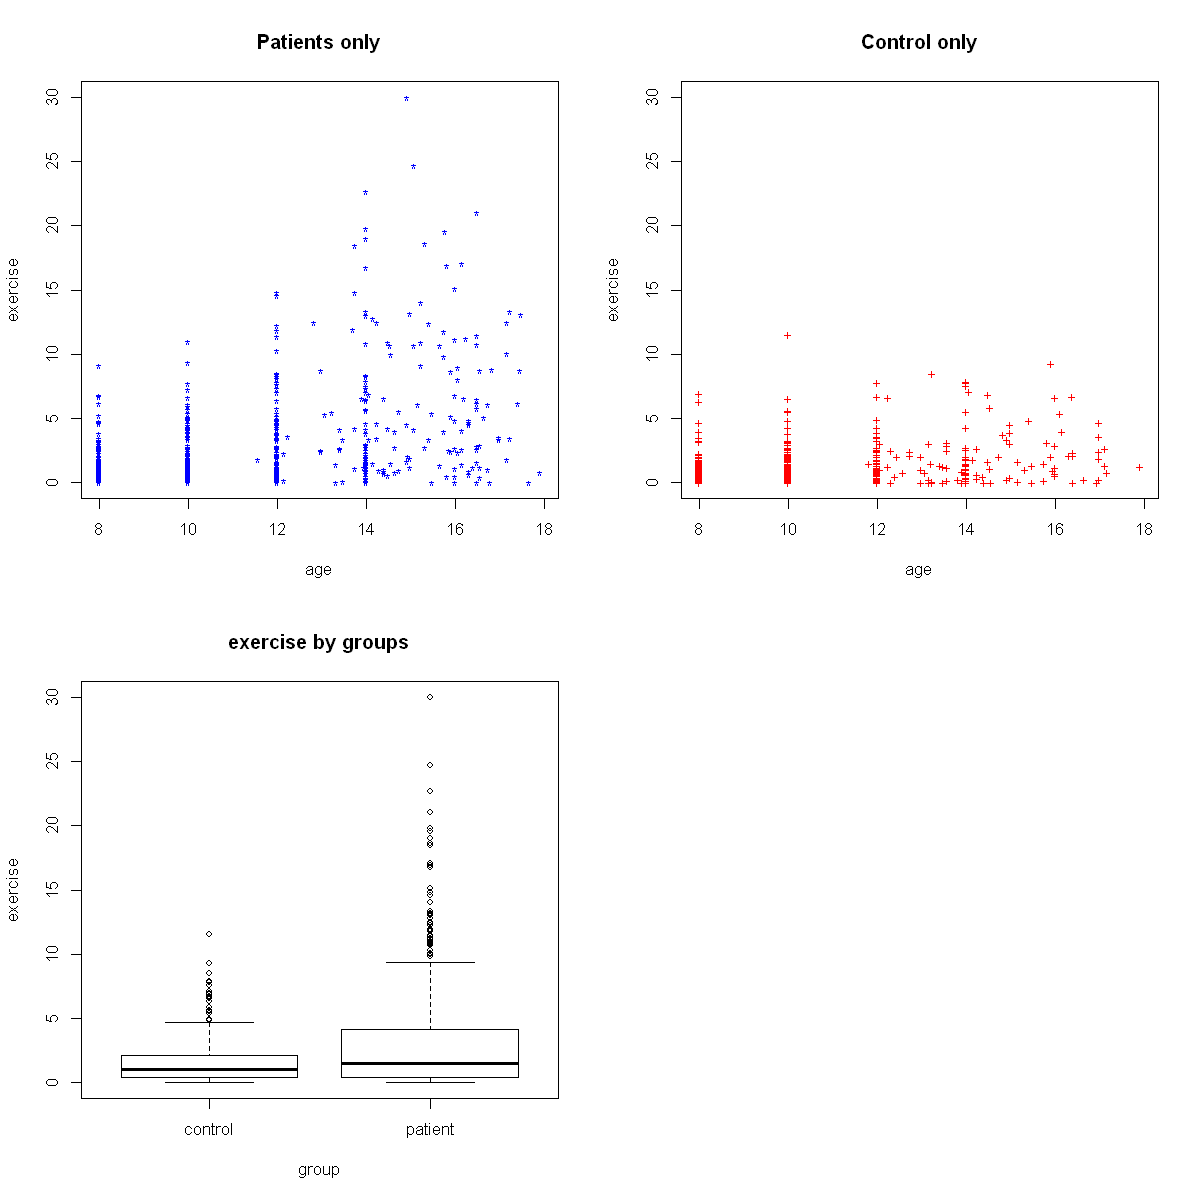

In [95]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow = c(2,2))
plot(exercise ~ age, data = girls, main = "Patients only", ylim=c(0,30), subset = girls$group == 'patient', col=colors, pch=shapes)
plot(exercise ~ age, data = girls, main = "Control only", ylim=c(0,30), subset = girls$group == 'control', col=colors, pch=shapes)
plot(exercise ~ group, data = girls, main = "exercise by groups", ylim=c(0,30))

$\text{Seems like part of the girls in the 'patient' group tend to excercise more when their age increases,}$
$\text{while the patients in the 'control' group seems to NOT excercise more.}$

### Group oservations by age range

__Because the observations was sampled every 2 years, we'll use the following age ranges:__
- 7.5-9.5
- 9.5-11.5
- 11.5-13.5
- 13.5-15.5
- 15.5-18


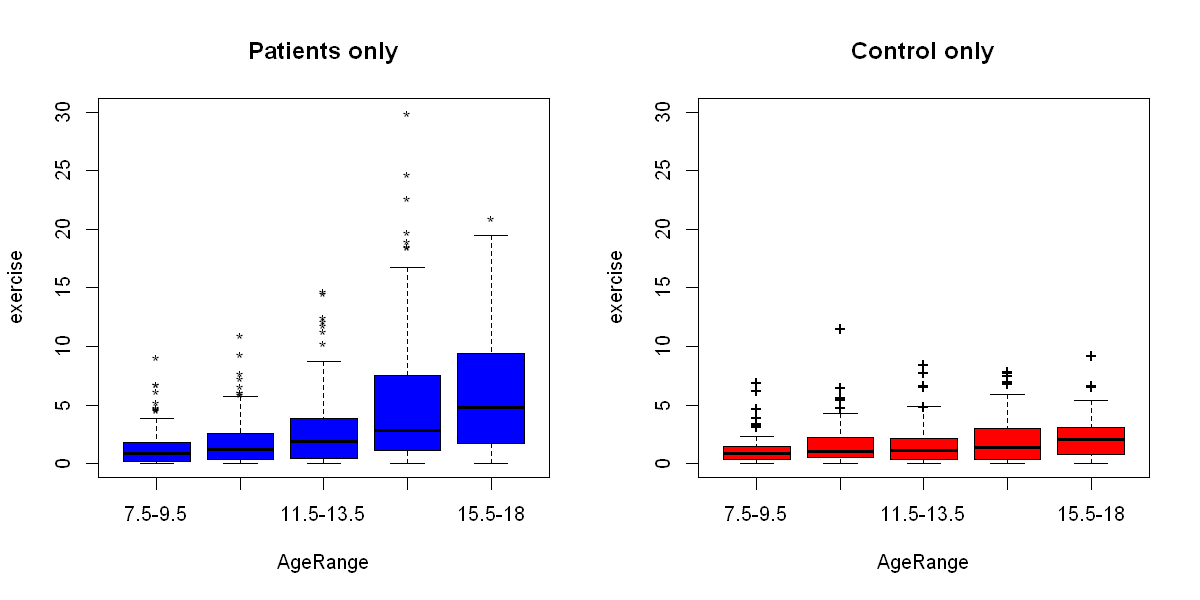

In [124]:
library(dplyr)
girls.age.range <- girls %>% group_by(AgeRange = cut(age, breaks = c(7.5,9.5,11.5,13.5,15.5,18),
                       labels = c("7.5-9.5", "9.5-11.5", "11.5-13.5", "13.5-15.5", "15.5-18")))

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(exercise ~ AgeRange, data = girls.age.range, main = "Patients only", ylim=c(0,30), subset = girls$group == 'patient', col=colors, pch=shapes)
plot(exercise ~ AgeRange, data = girls.age.range, main = "Control only", ylim=c(0,30), subset = girls$group == 'control', col=colors, pch=shapes)

$\text{When grouping the girls by age ranges, it is easyer to see the trend.}$
$\text{The exercise groth trend in the patients group looks exponential.}$

### Is there a difference between defferent AgeRange(s) and subject(s)?
**For each group:**
$$
\text{Test the hypothesis that there is no difference between age ranges}
$$
$$
H_0: \beta_{AgeRange} = 0
$$

In [131]:
summary(aov(exercise ~ AgeRange+subject, data = girls.age.range, subset = girls.age.range$group == 'patient'))
summary(aov(exercise ~ AgeRange+subject, data = girls.age.range, subset = girls.age.range$group == 'control'))

             Df Sum Sq Mean Sq F value Pr(>F)    
AgeRange      4   1810   452.5  55.648 <2e-16 ***
subject     137   4476    32.7   4.018 <2e-16 ***
Residuals   444   3610     8.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

             Df Sum Sq Mean Sq F value   Pr(>F)    
AgeRange      4   53.2  13.312   9.644 2.73e-07 ***
subject      92  762.5   8.288   6.004  < 2e-16 ***
Residuals   262  361.7   1.380                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

$\text{From the AOV table, we can conclude that there is a sigificant difference in exercise mean value between defferent age ranges and subjects in both group}$

## Fit an appropriate model performing transformations of original variables if necessary 
- Comment the results

In [366]:
none <- function(x){ return (x)}

girls.lme.res.plot <- function(fit, trans=none, subset=TRUE){
    options(repr.plot.width=10, repr.plot.height=10)
    par(mfrow = c(2,2))
    
#     if(!subset){
#         plot(girls$age, trans(girls$exercise))
#         lines(girls$age[girls$group == 'control'], trans(predict(fit, girls[girls$group == 'control',])), col="blue")
#         lines(girls$age[girls$group == 'patient'], trans(predict(fit, girls[girls$group == 'patient',])), col="red")
#     }else{
#         plot(girls$age[subset], trans(girls$exercise[subset]))
#         lines(girls[subset,]$age, trans(predict(fit, girls[subset,])), col="blue")
#     }
    plot(girls$age[subset], trans(girls$exercise[subset]))
    lines(girls$age[subset],fit$fitted[,1],col="red")

    
    plot(fitted(fit),residuals(fit))
    qqnorm(residuals(fit),main = "Normal Q-Q plot for residuals")
    qqnorm(ranef(fit)[,1],main = "Normal Q-Q plot for random intercepts")
}

### Random intercept for patients, REML

$$
exercise_{ij} | \alpha_{0i} \text{ ~ } N(\beta_{0} + \beta_{age_{ij}} + \alpha_{0i}, \sigma^2)
$$

Linear mixed-effects model fit by REML
 Data: girls 
  Subset: girls$group == "patient" 
      AIC    BIC   logLik
  3097.42 3114.9 -1544.71

Random effects:
 Formula: ~1 | subject
        (Intercept) Residual
StdDev:    2.362194  2.87437

Fixed effects: exercise ~ age 
                Value Std.Error  DF   t-value p-value
(Intercept) -4.130602 0.5479135 447 -7.538784       0
age          0.627005 0.0431553 447 14.529035       0
 Correlation: 
    (Intr)
age -0.904

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.00232681 -0.56404207 -0.08249321  0.32722472  6.25453758 

Number of Observations: 586
Number of Groups: 138 

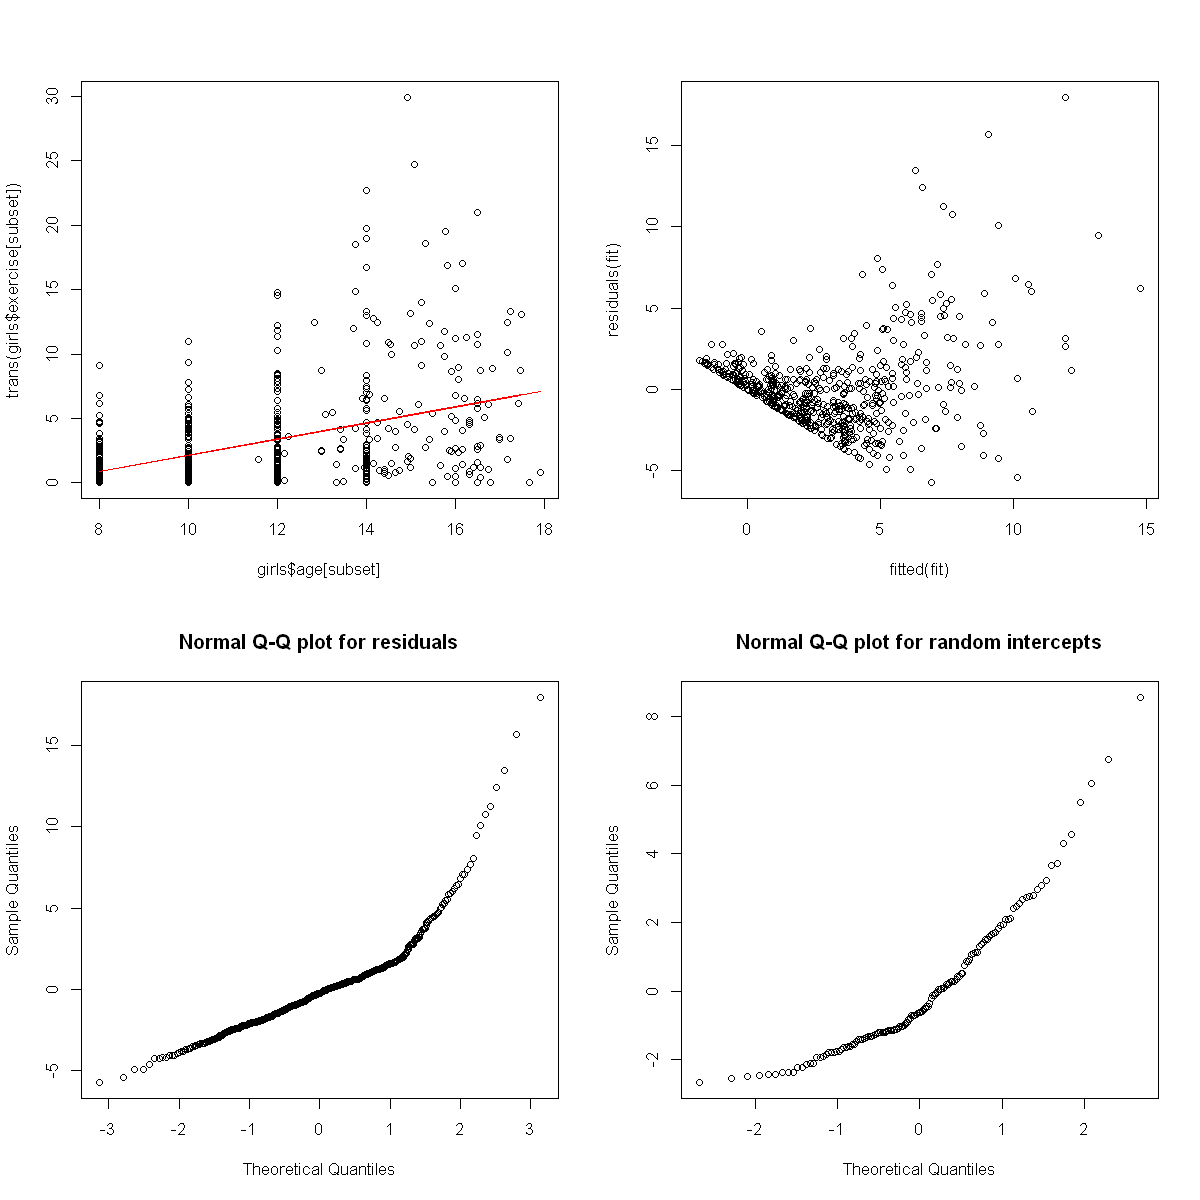

In [367]:
library("nlme")
fit1.patient <- lme(exercise ~ age, random = ~ 1|subject, method = "REML", data = girls, subset = girls$group == 'patient')
summary(fit1.patient,cor=F)

girls.lme.res.plot(fit = fit1.patient, subset = girls$group == 'patient')

# options(repr.plot.width=10, repr.plot.height=20)
# plot(fit1, exercise ~ fitted(.) | subject, abline = c(0,1), subset = girls$group == 'patient', main = "Patients - observed versus fitted values by Subject")

### Random intercept for control, REML

$$
exercise_{ij} | \alpha_{0i} \text{ ~ } N(\beta_{0} + \beta_{age_{ij}} + \alpha_{0i}, \sigma^2)
$$

Linear mixed-effects model fit by REML
 Data: girls 
  Subset: girls$group == "control" 
       AIC      BIC    logLik
  1309.417 1324.928 -650.7086

Random effects:
 Formula: ~1 | subject
        (Intercept) Residual
StdDev:    1.316608 1.171834

Fixed effects: exercise ~ age 
                Value  Std.Error  DF  t-value p-value
(Intercept) 0.1490416 0.30371405 265 0.490730   0.624
age         0.1316073 0.02370878 265 5.550993   0.000
 Correlation: 
    (Intr)
age -0.869

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.66295176 -0.44525693 -0.07912678  0.31276104  4.48742121 

Number of Observations: 359
Number of Groups: 93 

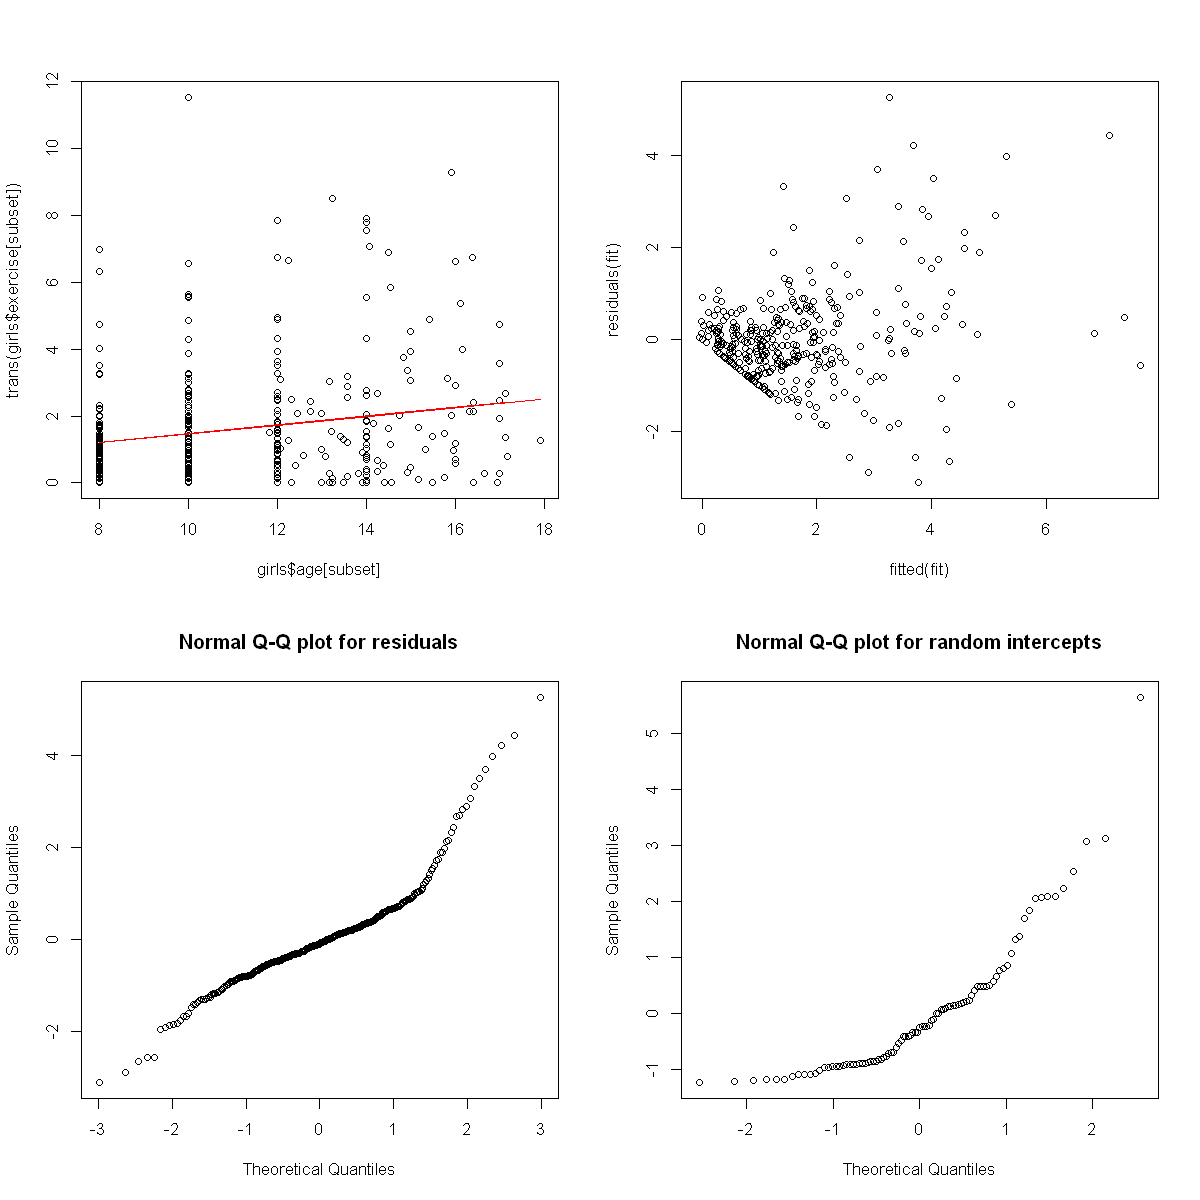

In [368]:
library("nlme")
fit1.control <- lme(exercise ~ age, random = ~ 1|subject, method = "REML", data = girls, subset = girls$group == 'control')
summary(fit1.control,cor=F)

girls.lme.res.plot(fit = fit1.control, subset = girls$group == 'control')

Linear mixed-effects model fit by REML
 Data: girls 
       AIC     BIC    logLik
  4654.958 4684.04 -2321.479

Random effects:
 Formula: ~1 | subject
        (Intercept) Residual
StdDev:    2.005929 2.384119

Fixed effects: exercise ~ age * group 
                     Value Std.Error  DF   t-value p-value
(Intercept)       0.146890 0.5885509 712  0.249579  0.8030
age               0.131934 0.0480475 712  2.745900  0.0062
grouppatient     -4.279203 0.7445251 229 -5.747560  0.0000
age:grouppatient  0.495264 0.0599201 712  8.265409  0.0000
 Correlation: 
                 (Intr) age    grpptn
age              -0.910              
grouppatient     -0.791  0.719       
age:grouppatient  0.730 -0.802 -0.906

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.44076978 -0.43180755 -0.07252791  0.26759259  7.50469284 

Number of Observations: 945
Number of Groups: 231 

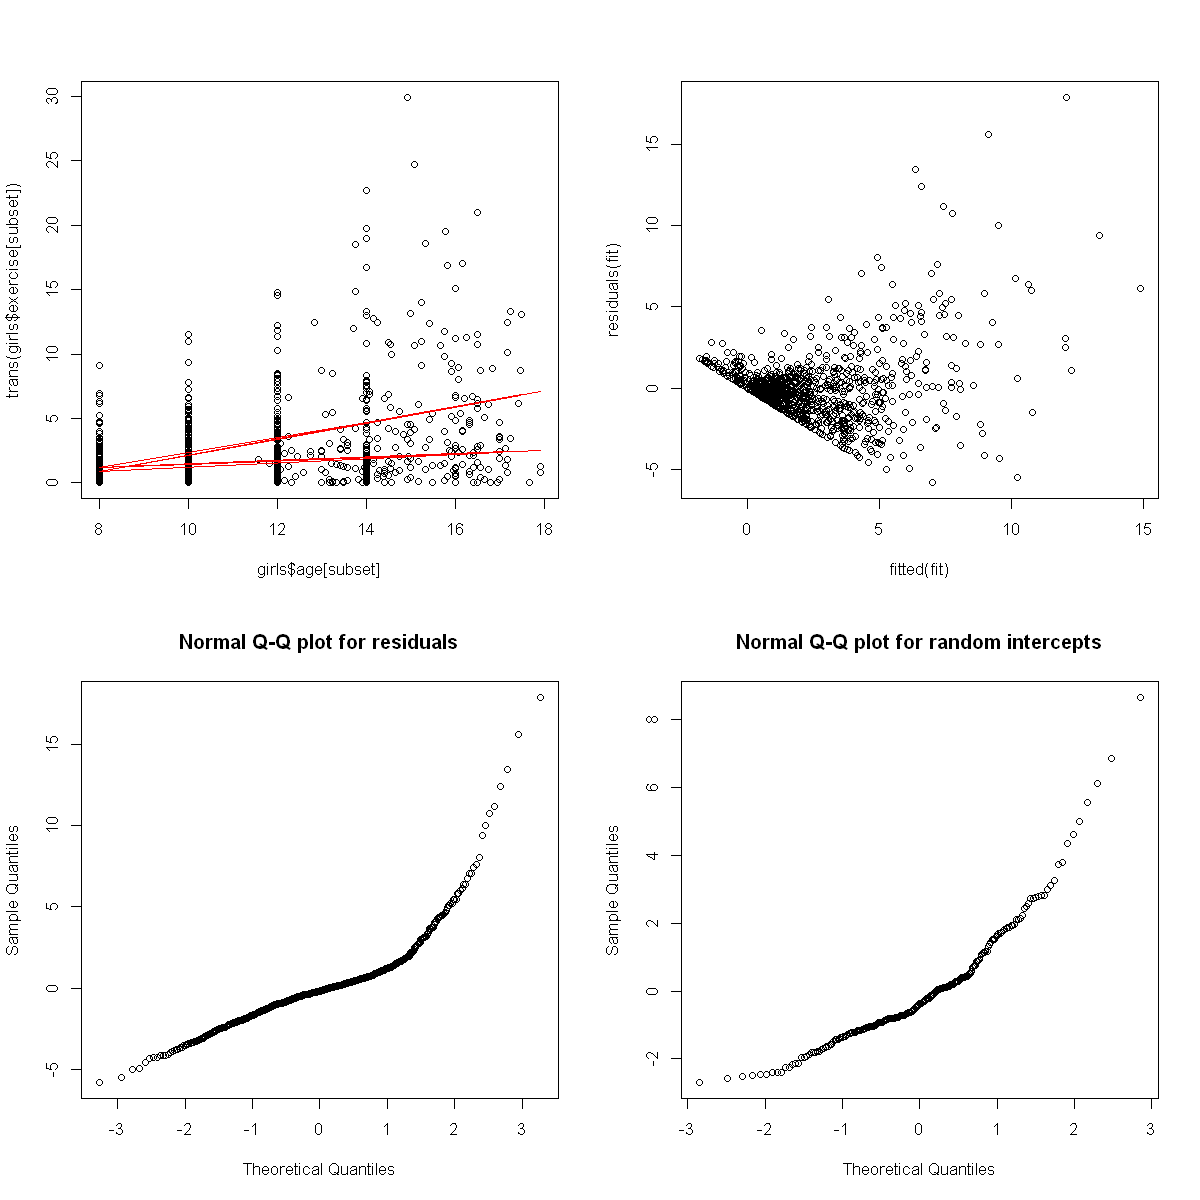

In [394]:
library("nlme")
fit1 <- lme(exercise ~ age * group , random = ~ 1|subject, method = "REML", data = girls)
summary(fit1,cor=F)

girls.lme.res.plot(fit = fit1)

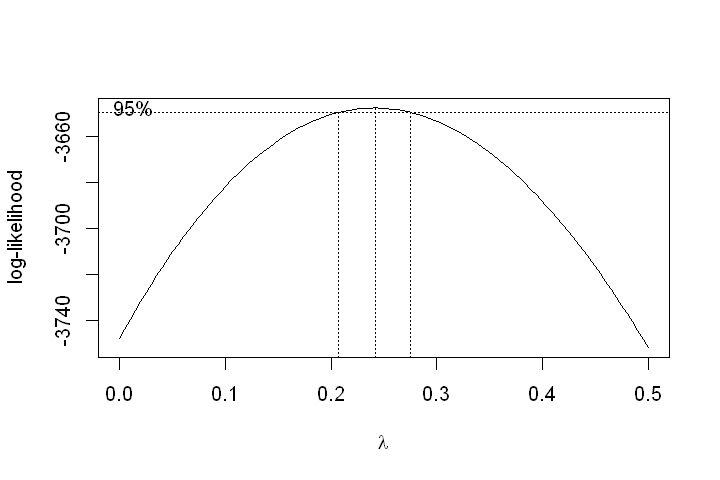

In [393]:
library(MASS)
options(repr.plot.width=6, repr.plot.height=4)
eps = 1e-5 # Adding eps to overcome zeros in boxcox
lmod = lm(exercise + eps ~ age * group, data = girls)
lamb = boxcox(lmod, lambda = seq(0,0.5,1/10), plotit = TRUE, eps=1/50, xlab = expression(lambda), ylab = "log-likelihood")

$\text{The residuals assumptions are clearly not met, let's try to find a proper transformation}$

Linear mixed-effects model fit by maximum likelihood
 Data: girls 
       AIC      BIC   logLik
  998.1701 1027.277 -493.085

Random effects:
 Formula: ~1 | subject
        (Intercept)  Residual
StdDev:   0.3185901 0.3386712

Fixed effects: exercise^0.25 ~ age * group 
                      Value  Std.Error  DF   t-value p-value
(Intercept)       0.8061370 0.08515858 712  9.466304   0.000
age               0.0132227 0.00685112 712  1.929999   0.054
grouppatient     -0.5317427 0.10778613 229 -4.933313   0.000
age:grouppatient  0.0557094 0.00854209 712  6.521757   0.000
 Correlation: 
                 (Intr) age    grpptn
age              -0.896              
grouppatient     -0.790  0.708       
age:grouppatient  0.719 -0.802 -0.892

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-3.2299441 -0.3492972  0.1303298  0.5446700  2.7298259 

Number of Observations: 945
Number of Groups: 231 

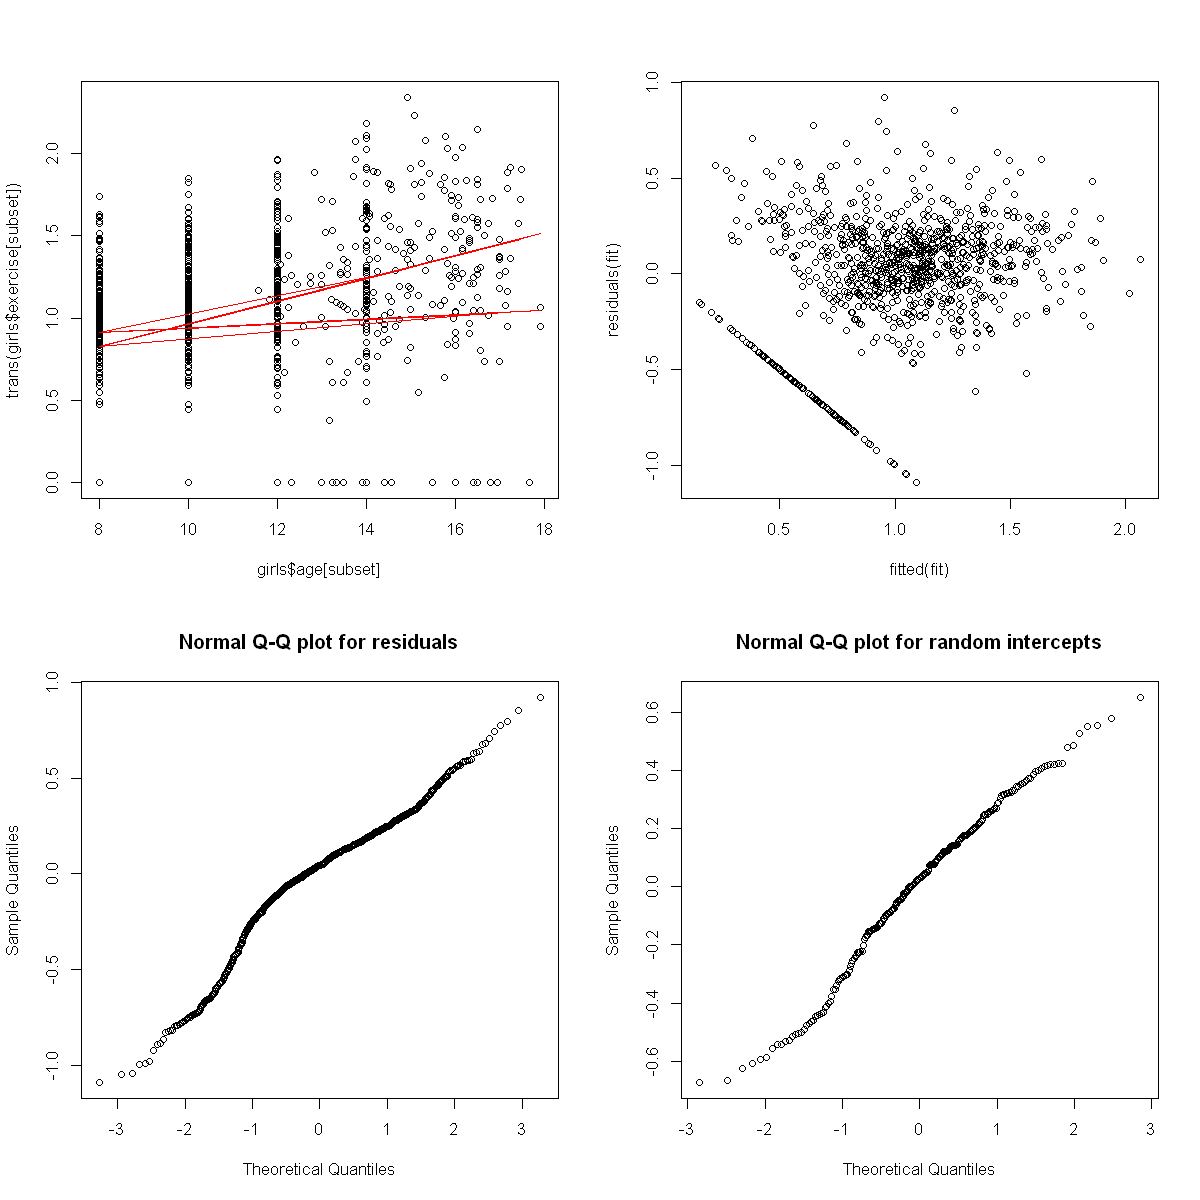

In [430]:
library("nlme")
fit2 <- lme(exercise ^ 0.25 ~ age*group, random = ~ 1|subject, method = "ML", data = girls)
summary(fit2,cor=F)

girls.lme.res.plot(fit = fit2, trans=function(x){ x^0.25})

Linear mixed-effects model fit by maximum likelihood
 Data: girls 
       AIC      BIC    logLik
  985.3571 1024.167 -484.6785

Random effects:
 Formula: ~age | subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev     Corr  
(Intercept) 0.47231274 (Intr)
age         0.03811074 -0.748
Residual    0.31755622       

Fixed effects: exercise^0.25 ~ age * group 
                      Value  Std.Error  DF   t-value p-value
(Intercept)       0.8177369 0.09032523 712  9.053250  0.0000
age               0.0119907 0.00778321 712  1.540582  0.1239
grouppatient     -0.5610182 0.11446302 229 -4.901305  0.0000
age:grouppatient  0.0587229 0.00976718 712  6.012263  0.0000
 Correlation: 
                 (Intr) age    grpptn
age              -0.911              
grouppatient     -0.789  0.719       
age:grouppatient  0.726 -0.797 -0.907

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.8859532 -0.3261629  0.1252671

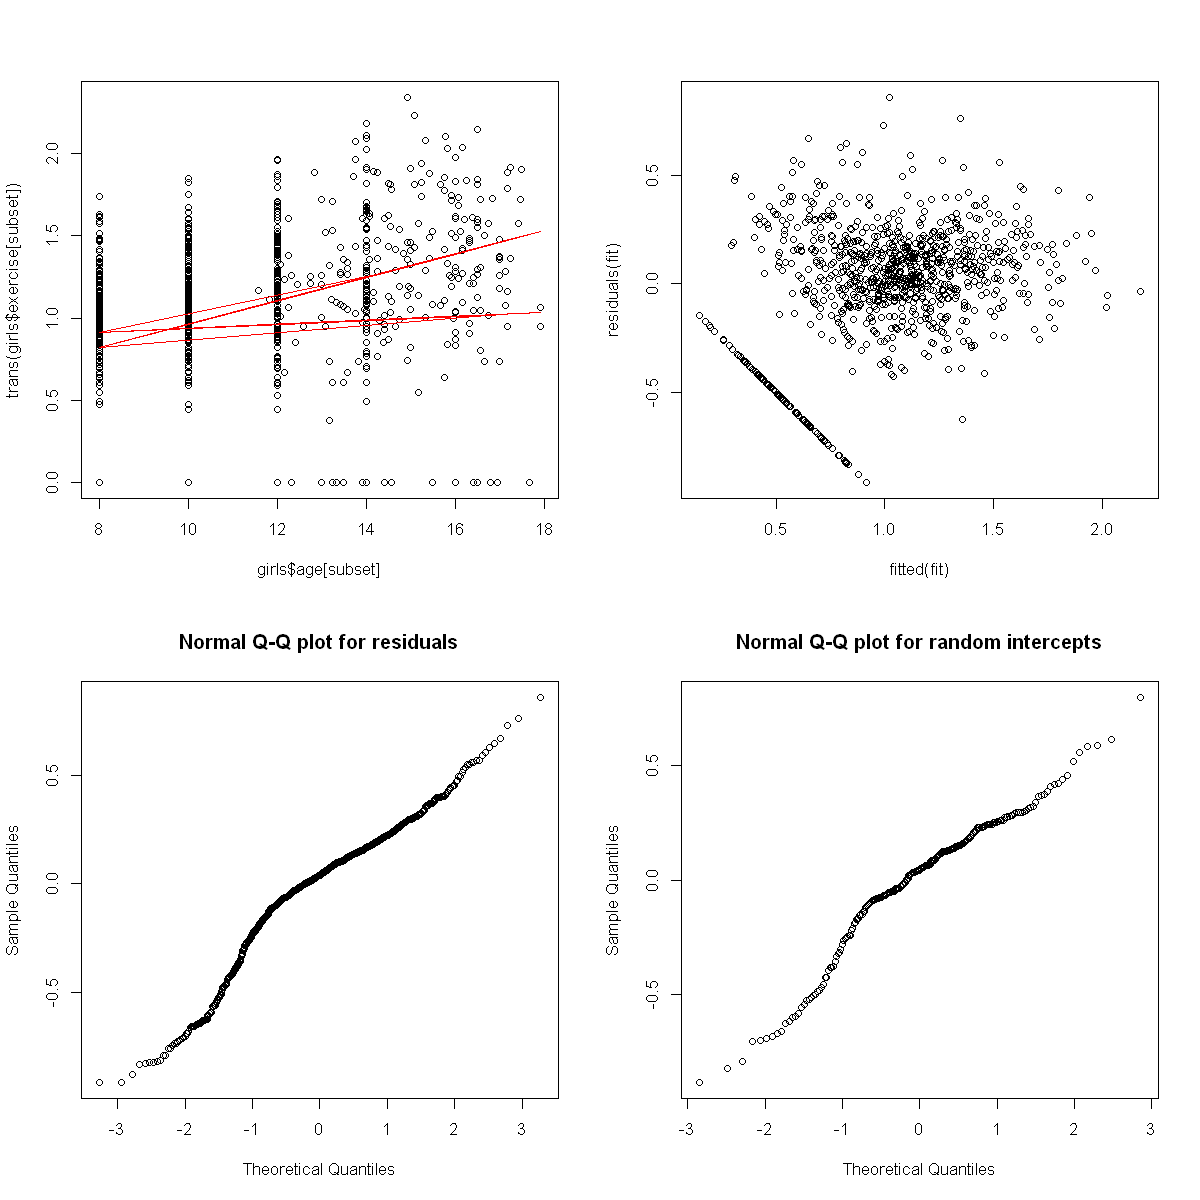

In [431]:
library("nlme")
fit3 <- lme(exercise ^ 0.25 ~ age*group, random = ~ age|subject, method = "ML", data = girls)
summary(fit3,cor=F)

girls.lme.res.plot(fit = fit3, trans=function(x){ x^0.25})

In [432]:
print(anova(fit2, fit3))

     Model df      AIC      BIC    logLik   Test  L.Ratio p-value
fit2     1  6 998.1701 1027.277 -493.0850                        
fit3     2  8 985.3571 1024.167 -484.6785 1 vs 2 16.81301   2e-04


Linear mixed-effects model fit by maximum likelihood
 Data: girls 
       AIC      BIC    logLik
  1039.431 1058.836 -515.7155

Random effects:
 Formula: ~1 | subject
        (Intercept)  Residual
StdDev:   0.3183609 0.3488781

Fixed effects: exercise^0.25 ~ age 
                Value  Std.Error  DF   t-value p-value
(Intercept) 0.4622574 0.05338536 713  8.658878       0
age         0.0492513 0.00420770 713 11.705035       0
 Correlation: 
    (Intr)
age -0.894

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.8992123 -0.3604024  0.1629681  0.5267672  2.8377519 

Number of Observations: 945
Number of Groups: 231 

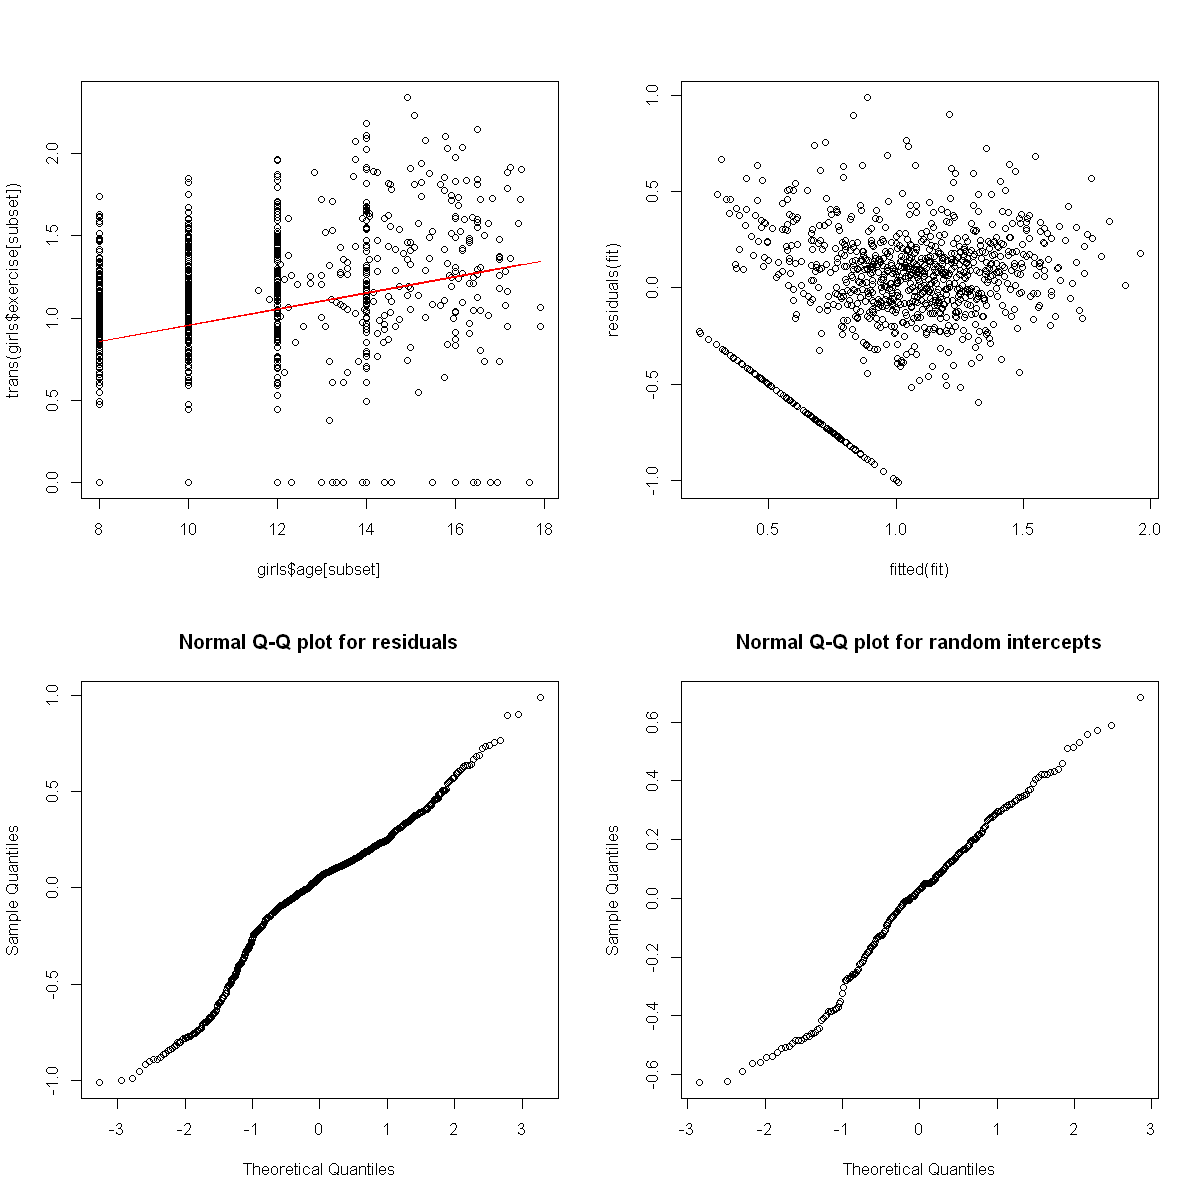

In [439]:
library("nlme")
fit4 <- lme(exercise ^ 0.25 ~ age, random = ~ 1|subject, method = "ML", data = girls)
summary(fit4,cor=F)

girls.lme.res.plot(fit = fit4, trans=function(x){ x^0.25})

Linear mixed-effects model fit by maximum likelihood
 Data: girls 
       AIC      BIC    logLik
  1037.598 1061.854 -513.7992

Random effects:
 Formula: ~1 | subject
        (Intercept)  Residual
StdDev:   0.3151058 0.3488334

Fixed effects: exercise^0.25 ~ age + group 
                 Value  Std.Error  DF   t-value p-value
(Intercept)  0.4075367 0.06019778 713  6.769963   0.000
age          0.0490023 0.00421065 713 11.637695   0.000
grouppatient 0.0953352 0.04858728 229  1.962143   0.051
 Correlation: 
             (Intr) age   
age          -0.779       
grouppatient -0.464 -0.029

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.9216597 -0.3550367  0.1612132  0.5188557  2.8112285 

Number of Observations: 945
Number of Groups: 231 

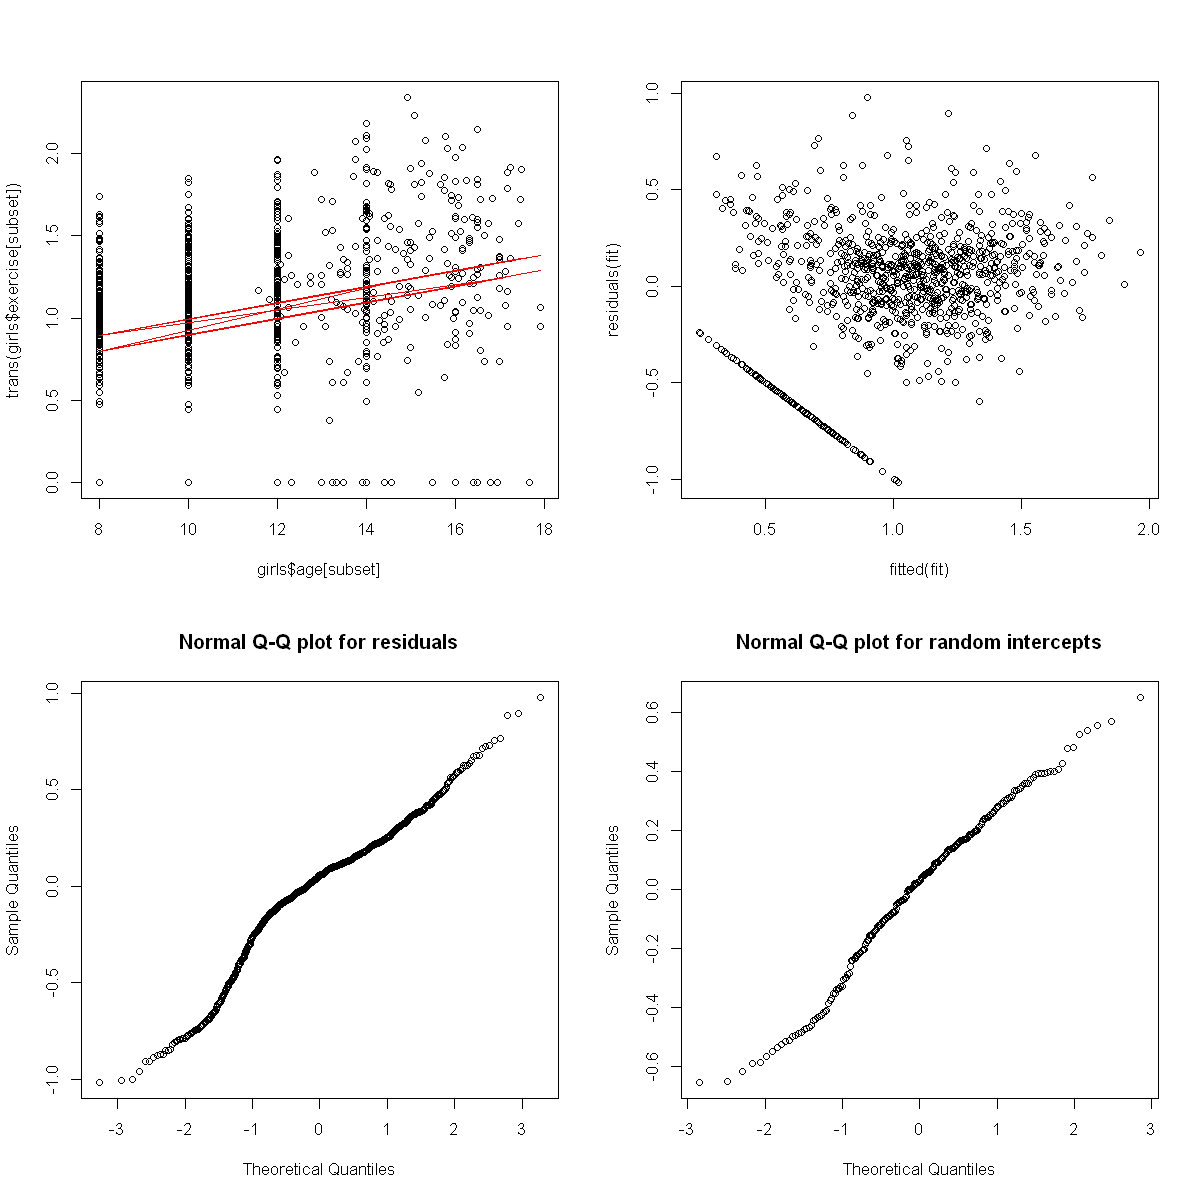

In [441]:
library("nlme")
fit5 <- lme(exercise ^ 0.25 ~ age + group, random = ~ 1|subject, method = "ML", data = girls)
summary(fit5,cor=F)

girls.lme.res.plot(fit = fit5, trans=function(x){ x^0.25})

In [443]:
print(anova(fit4, fit5, fit2))

     Model df       AIC      BIC    logLik   Test  L.Ratio p-value
fit4     1  4 1039.4309 1058.836 -515.7155                        
fit5     2  5 1037.5983 1061.854 -513.7992 1 vs 2  3.83259  0.0503
fit2     3  6  998.1701 1027.277 -493.0850 2 vs 3 41.42824  <.0001


Linear mixed-effects model fit by maximum likelihood
 Data: girls 
       AIC      BIC    logLik
  1020.292 1044.548 -505.1458

Random effects:
 Formula: ~1 | subject
        (Intercept)  Residual
StdDev:   0.3209893 0.3434446

Fixed effects: exercise^0.25 ~ age + group:age 
                     Value  Std.Error  DF  t-value p-value
(Intercept)      0.4742661 0.05285390 712 8.973153       0
age              0.0371939 0.00489862 712 7.592719       0
age:grouppatient 0.0180341 0.00389533 712 4.629663       0
 Correlation: 
                 (Intr) age   
age              -0.779       
age:grouppatient  0.050 -0.533

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-3.0301797 -0.3537389  0.1615216  0.5422078  2.7852778 

Number of Observations: 945
Number of Groups: 231 

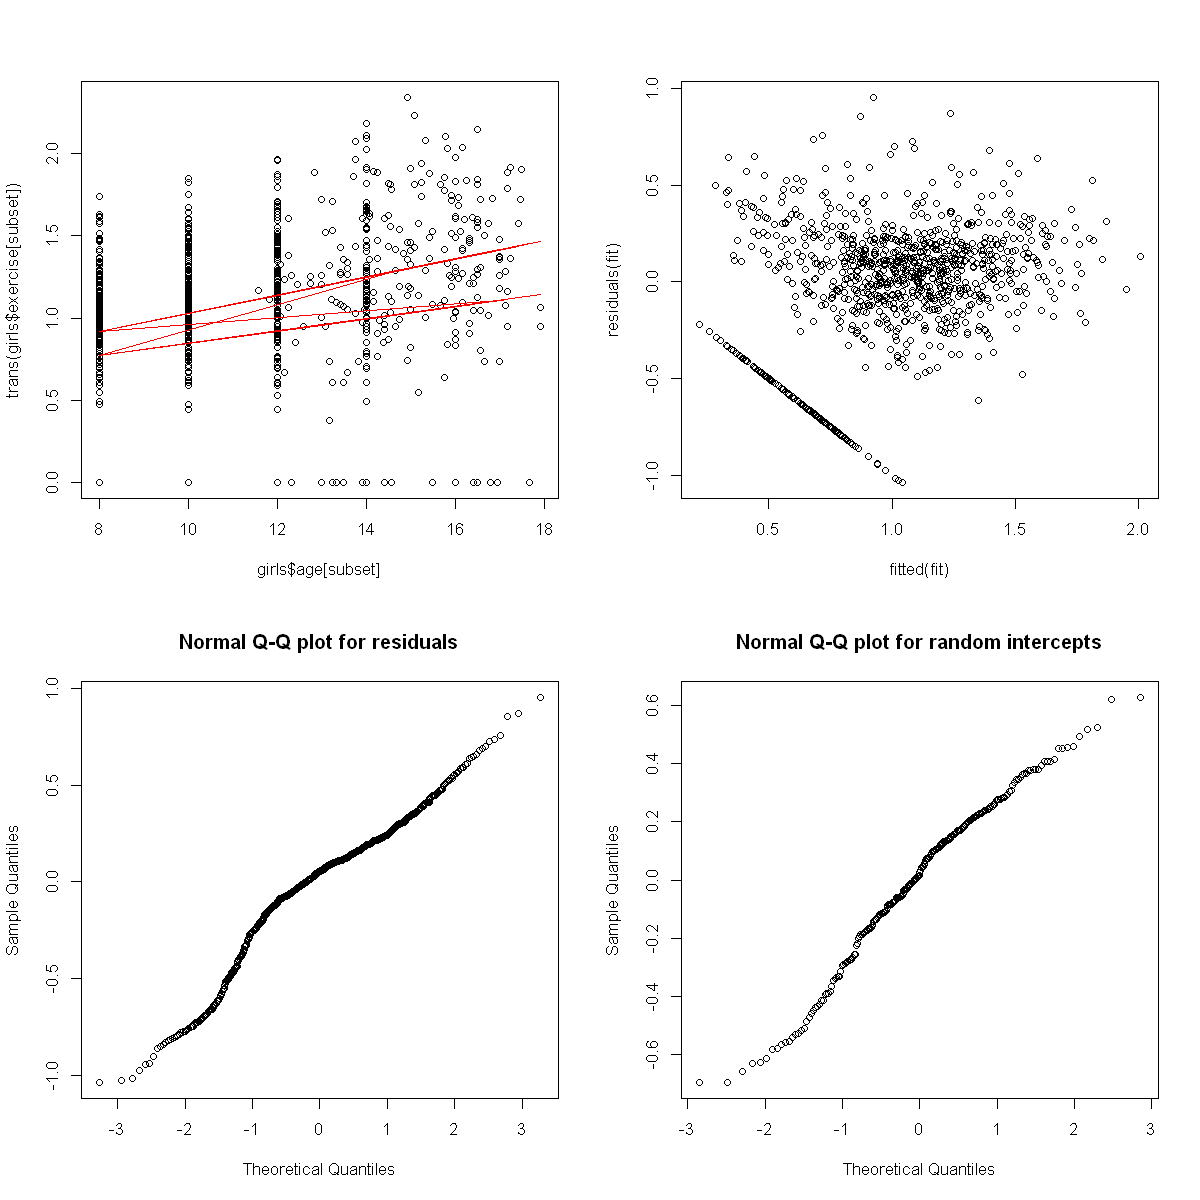

In [444]:
library("nlme")
fit6 <- lme(exercise ^ 0.25 ~ age + group:age, random = ~ 1|subject, method = "ML", data = girls)
summary(fit6,cor=F)

girls.lme.res.plot(fit = fit6, trans=function(x){ x^0.25})

In [452]:
print(anova(fit6, fit4)) #interaction is significant
print(anova(fit5, fit4)) # age is not significant

     Model df      AIC      BIC    logLik   Test  L.Ratio p-value
fit6     1  5 1020.292 1044.548 -505.1458                        
fit4     2  4 1039.431 1058.836 -515.7155 1 vs 2 21.13926  <.0001
     Model df      AIC      BIC    logLik   Test L.Ratio p-value
fit5     1  5 1037.598 1061.854 -513.7992                       
fit4     2  4 1039.431 1058.836 -515.7155 1 vs 2 3.83259  0.0503


Linear mixed-effects model fit by REML
 Data: girls 
  Subset: girls$group == "control" 
       AIC      BIC    logLik
  327.5423 350.8087 -157.7711

Random effects:
 Formula: ~age | subject
 Structure: General positive-definite, Log-Cholesky parametrization
            StdDev     Corr  
(Intercept) 0.39476523 (Intr)
age         0.04385497 -0.827
Residual    0.29272602       

Fixed effects: exercise^0.25 ~ age 
                Value  Std.Error  DF   t-value p-value
(Intercept) 0.8206454 0.08159365 265 10.057711  0.0000
age         0.0116556 0.00774327 265  1.505259  0.1334
 Correlation: 
    (Intr)
age -0.925

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-2.8695145 -0.2549715  0.1804959  0.5185503  2.1563996 

Number of Observations: 359
Number of Groups: 93 

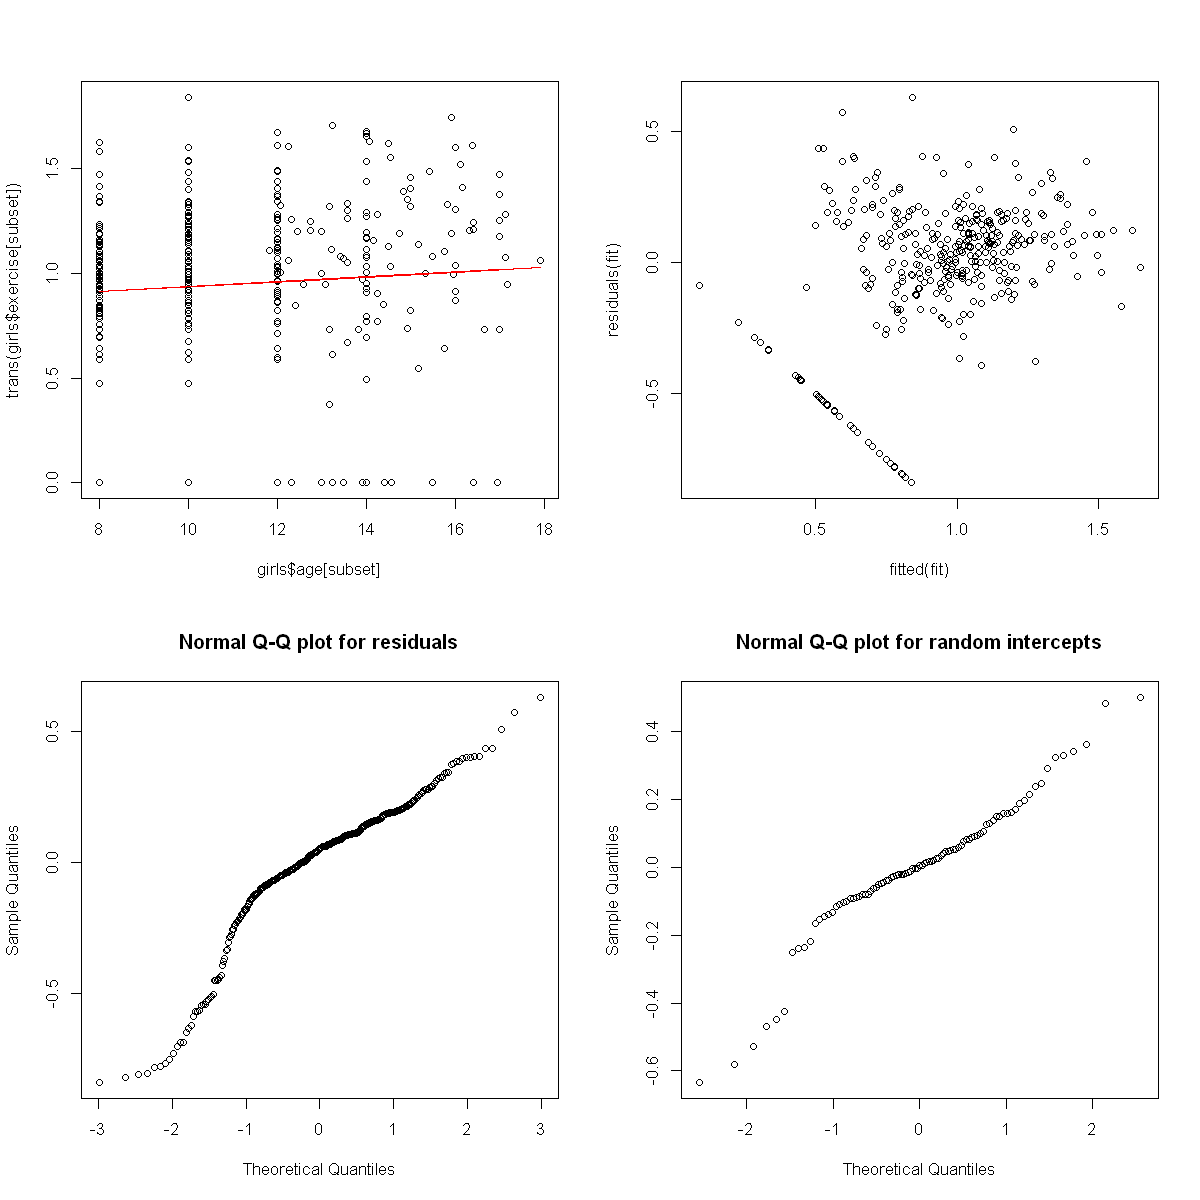

In [457]:
library("nlme")
fit7.control <- lme(exercise ^ 0.25 ~ age, random = ~ age|subject, method = "REML", data = girls, subset = girls$group == 'control')
summary(fit7.control,cor=F)

girls.lme.res.plot(fit = fit7.control, trans=function(x){ x^0.25}, subset = girls$group == 'control')

Linear mixed-effects model fit by REML
 Data: girls 
  Subset: girls$group == "control" 
       AIC    BIC    logLik
  339.6591 355.17 -165.8295

Random effects:
 Formula: ~1 | subject
        (Intercept)  Residual
StdDev:   0.2655787 0.3201087

Fixed effects: exercise^0.25 ~ age 
                Value  Std.Error  DF   t-value p-value
(Intercept) 0.8062639 0.07887648 265 10.221854  0.0000
age         0.0132150 0.00644977 265  2.048902  0.0415
 Correlation: 
    (Intr)
age -0.911

Standardized Within-Group Residuals:
       Min         Q1        Med         Q3        Max 
-3.2442680 -0.2400616  0.1625240  0.5496808  2.3206960 

Number of Observations: 359
Number of Groups: 93 

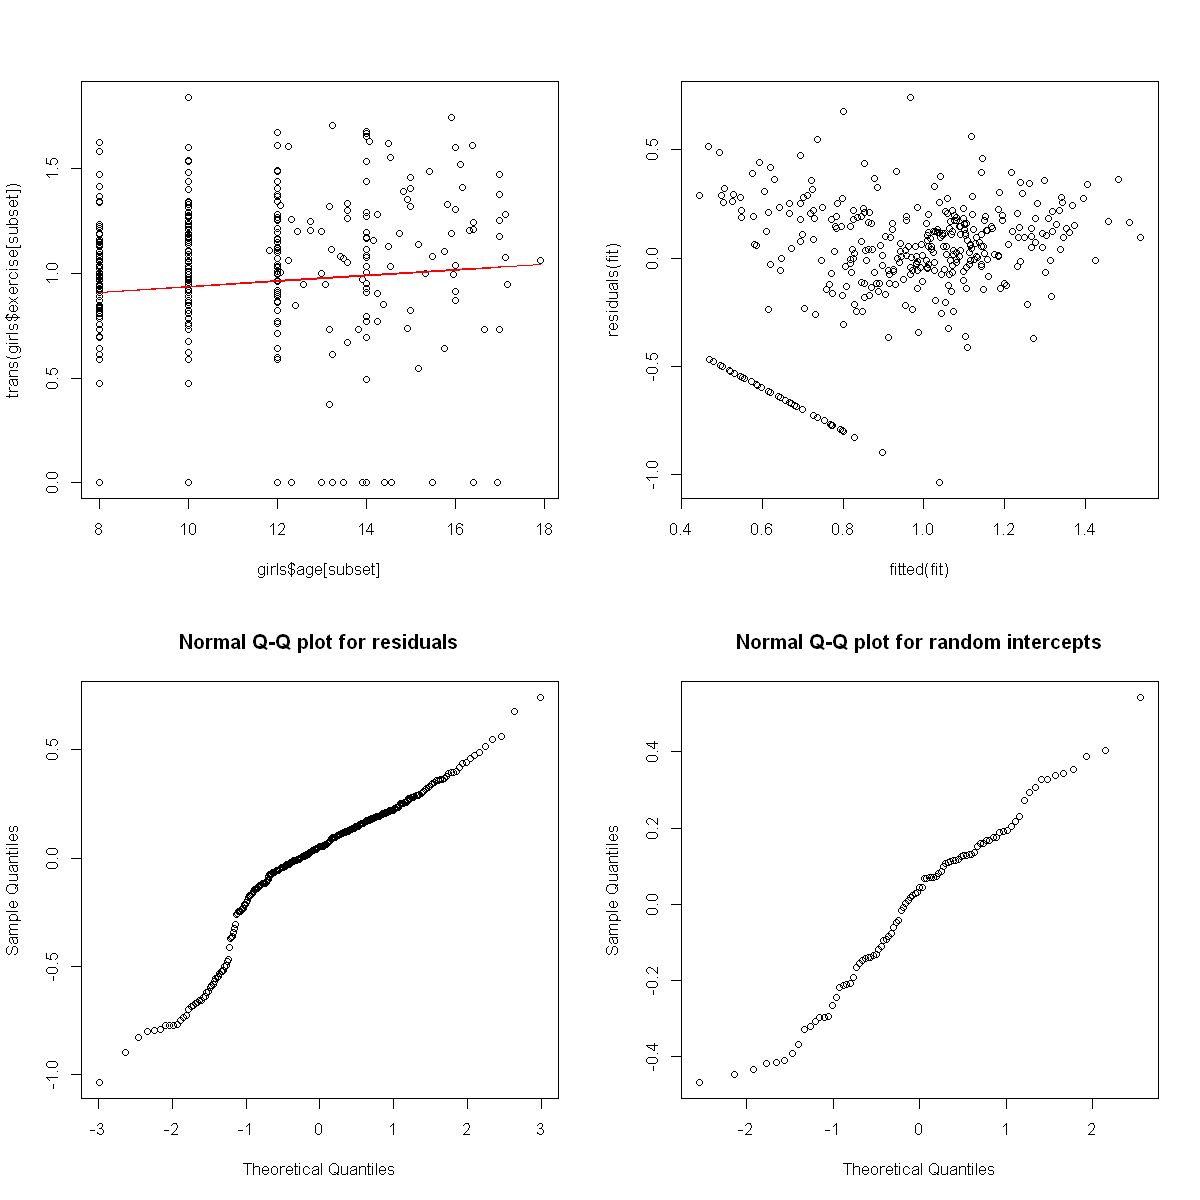

In [458]:
library("nlme")
fit7.control2 <- lme(exercise ^ 0.25 ~ age, random = ~ 1|subject, method = "REML", data = girls, subset = girls$group == 'control')
summary(fit7.control2,cor=F)

girls.lme.res.plot(fit = fit7.control2, trans=function(x){ x^0.25}, subset = girls$group == 'control')

In [459]:
print(anova(fit7.control, fit7.control2))

              Model df      AIC      BIC    logLik   Test  L.Ratio p-value
fit7.control      1  6 327.5423 350.8087 -157.7711                        
fit7.control2     2  4 339.6591 355.1700 -165.8296 1 vs 2 16.11681   3e-04


$\text{Seems like a 4th root will be a good transformation here, will treat subject's effect as random } $

$$
\sqrt[4]{exercise_{ij}} | \alpha_{0i} \text{ ~ } N(\beta_{0} + \beta_{AgeRange_{j}} + \beta_{group_{i}} + \alpha_{0i}, \sigma^2)
$$

$\text{Since the trend looks exponential, let's try to examin the data on log scale:}$

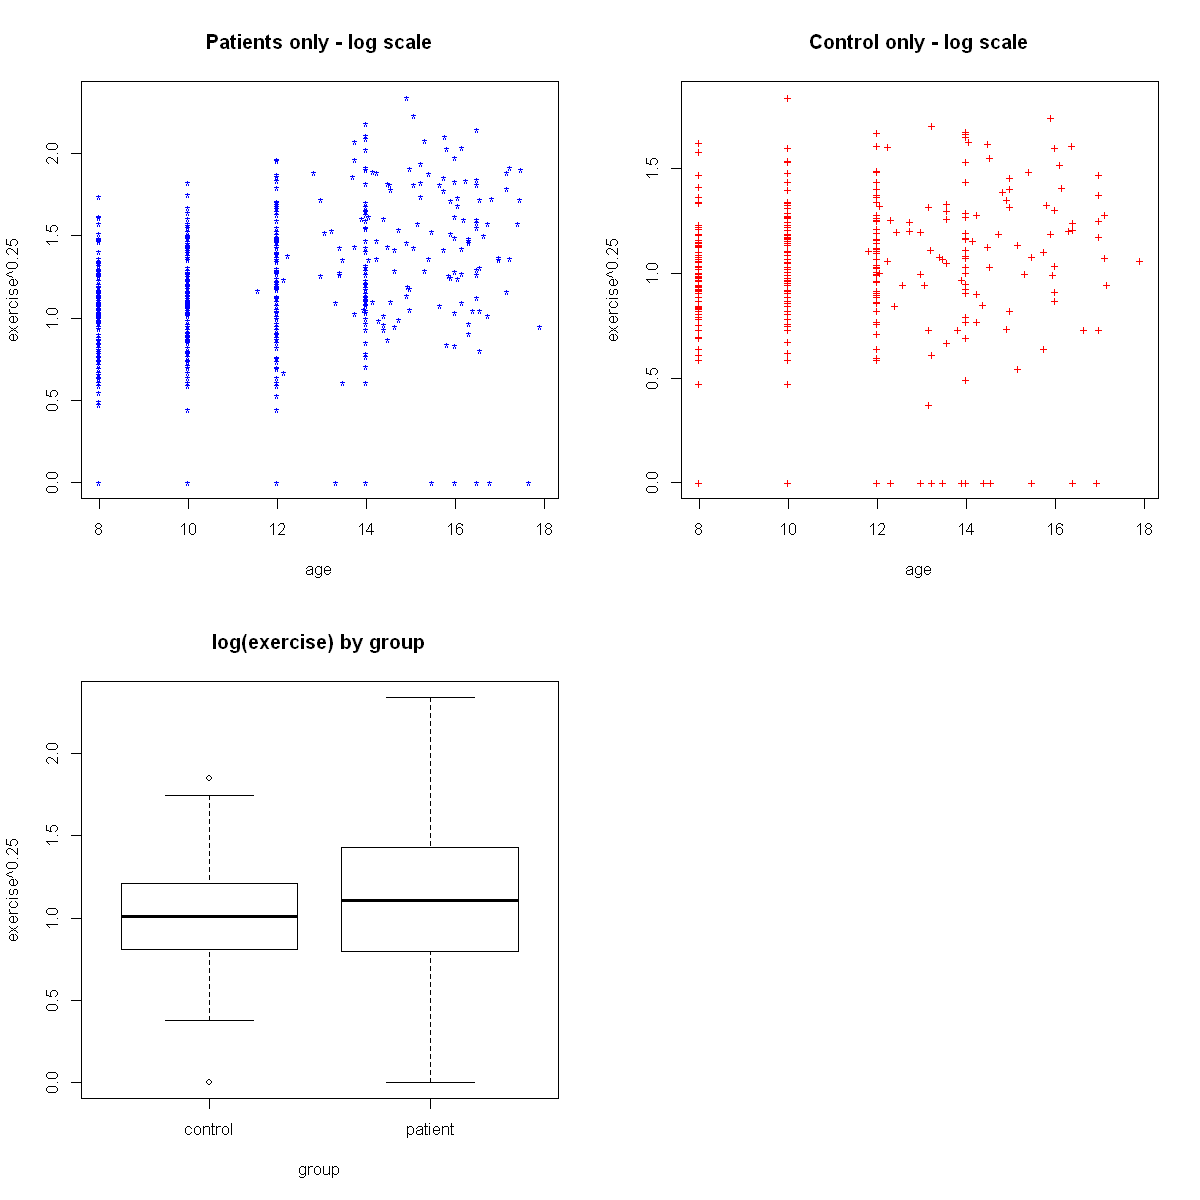

In [93]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow = c(2,2))
plot(exercise ^ 0.25 ~ age, data = girls, main = "Patients only - log scale", subset = girls$group == 'patient', col=colors, pch=shapes)
plot(exercise ^ 0.25 ~ age, data = girls, main = "Control only - log scale", subset = girls$group == 'control', col=colors, pch=shapes)
plot(exercise ^ 0.25 ~ group, data = girls, main = "log(exercise) by group")


Linear mixed-effects model fit by maximum likelihood
 Data: girls 
       AIC      BIC    logLik
  4721.527 4740.932 -2356.764

Random effects:
 Formula: ~1 | subject
        (Intercept) Residual
StdDev:    2.059111 2.492803

Fixed effects: exercise ~ age 
                 Value Std.Error  DF   t-value p-value
(Intercept) -2.6579941 0.3758532 713 -7.071895       0
age          0.4539453 0.0300289 713 15.116958       0
 Correlation: 
    (Intr)
age -0.906

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-2.53723896 -0.51263334 -0.07476374  0.30141921  7.51126074 

Number of Observations: 945
Number of Groups: 231 


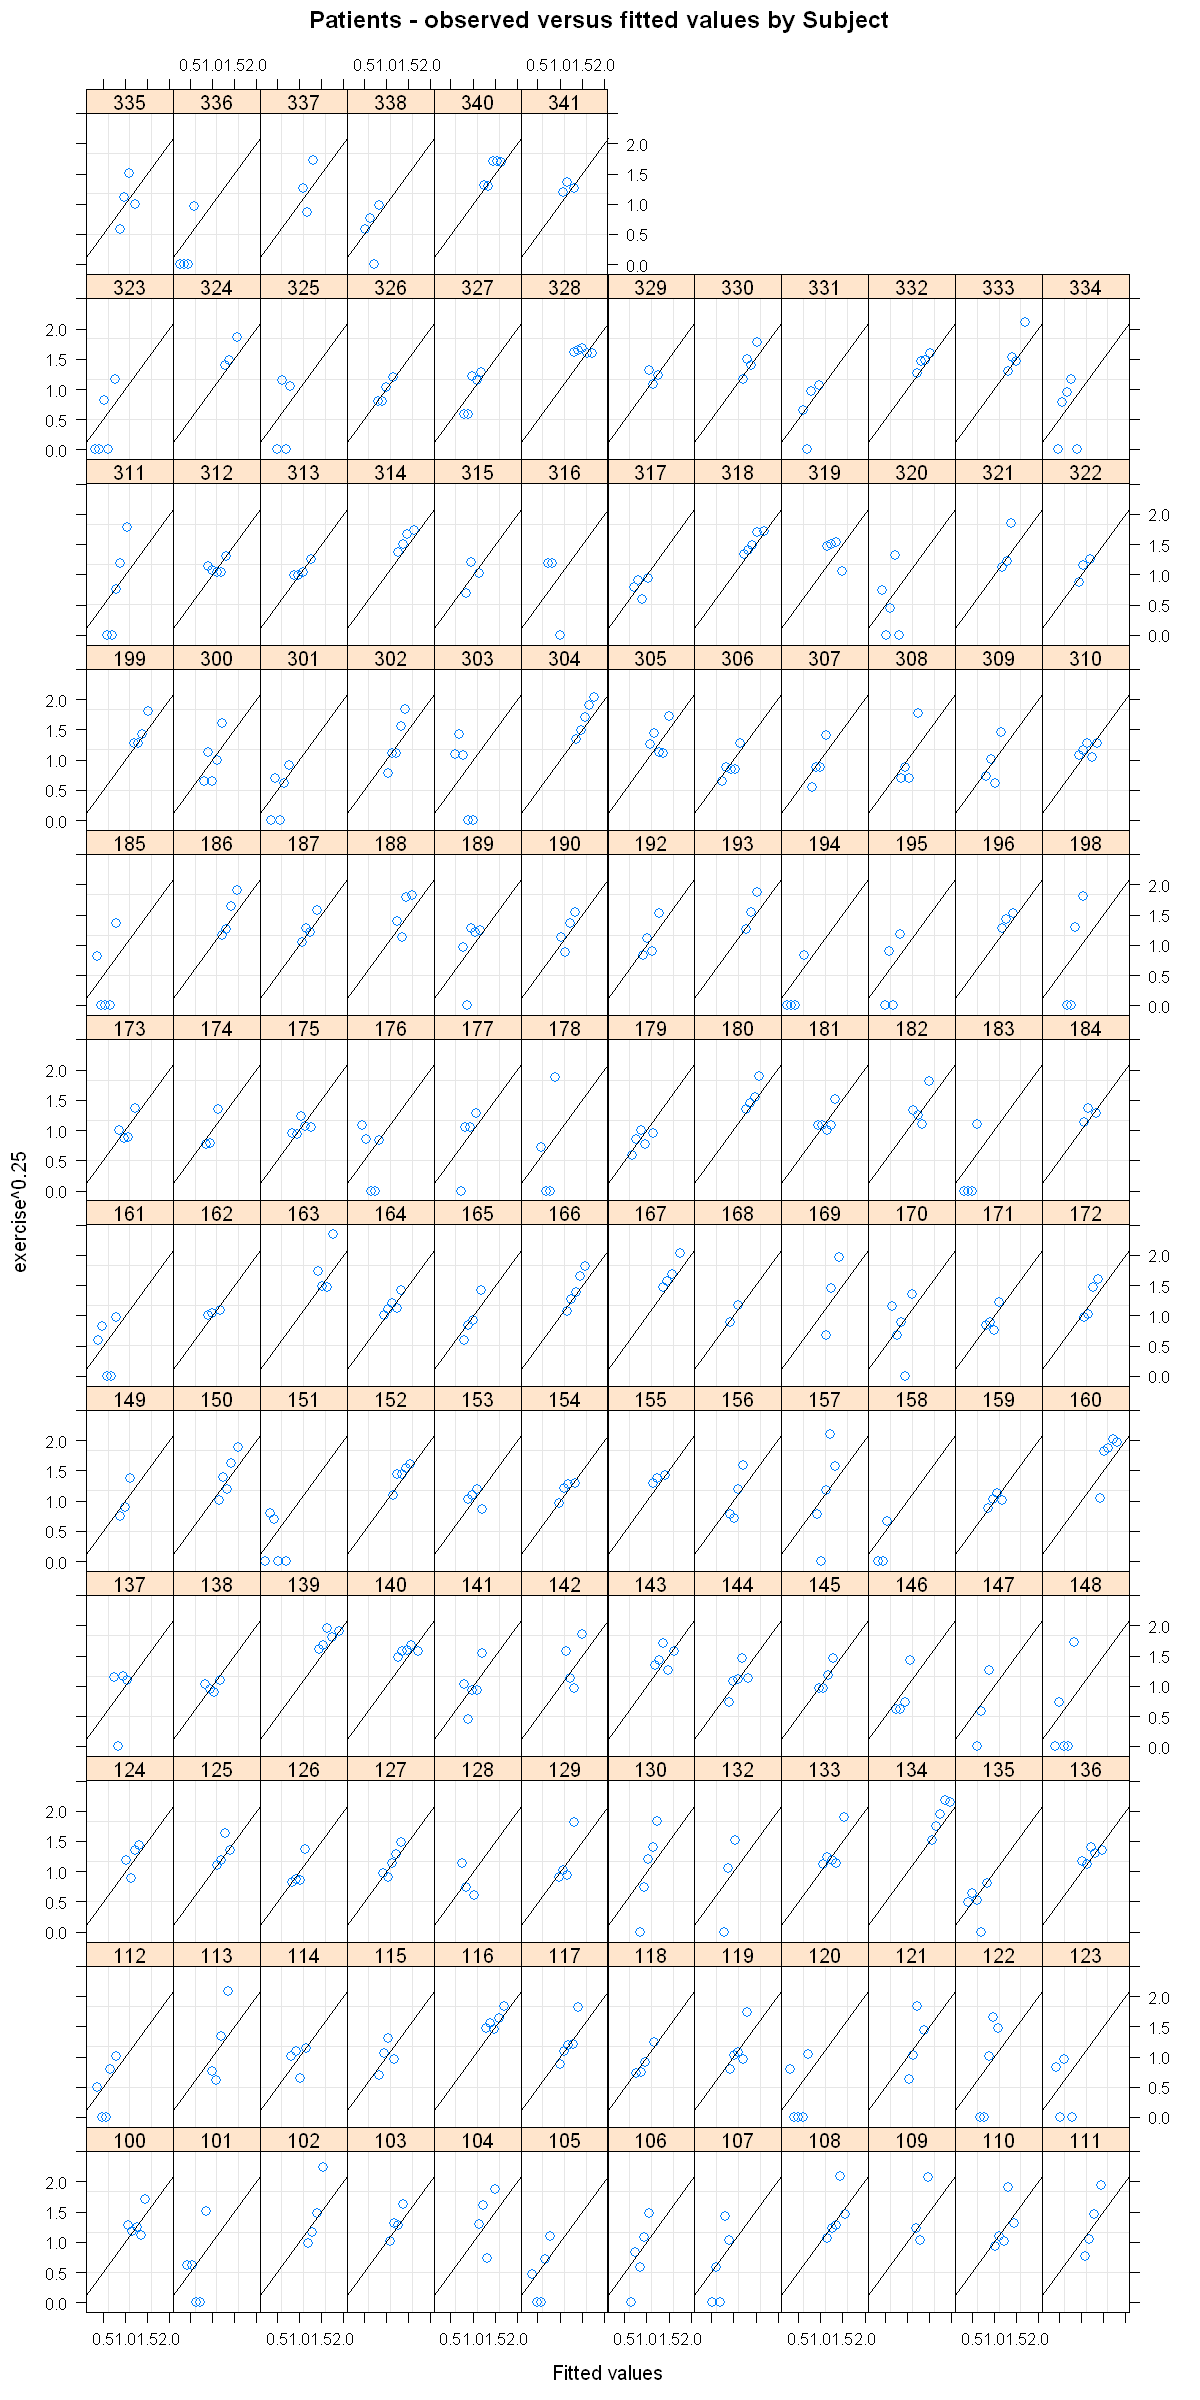

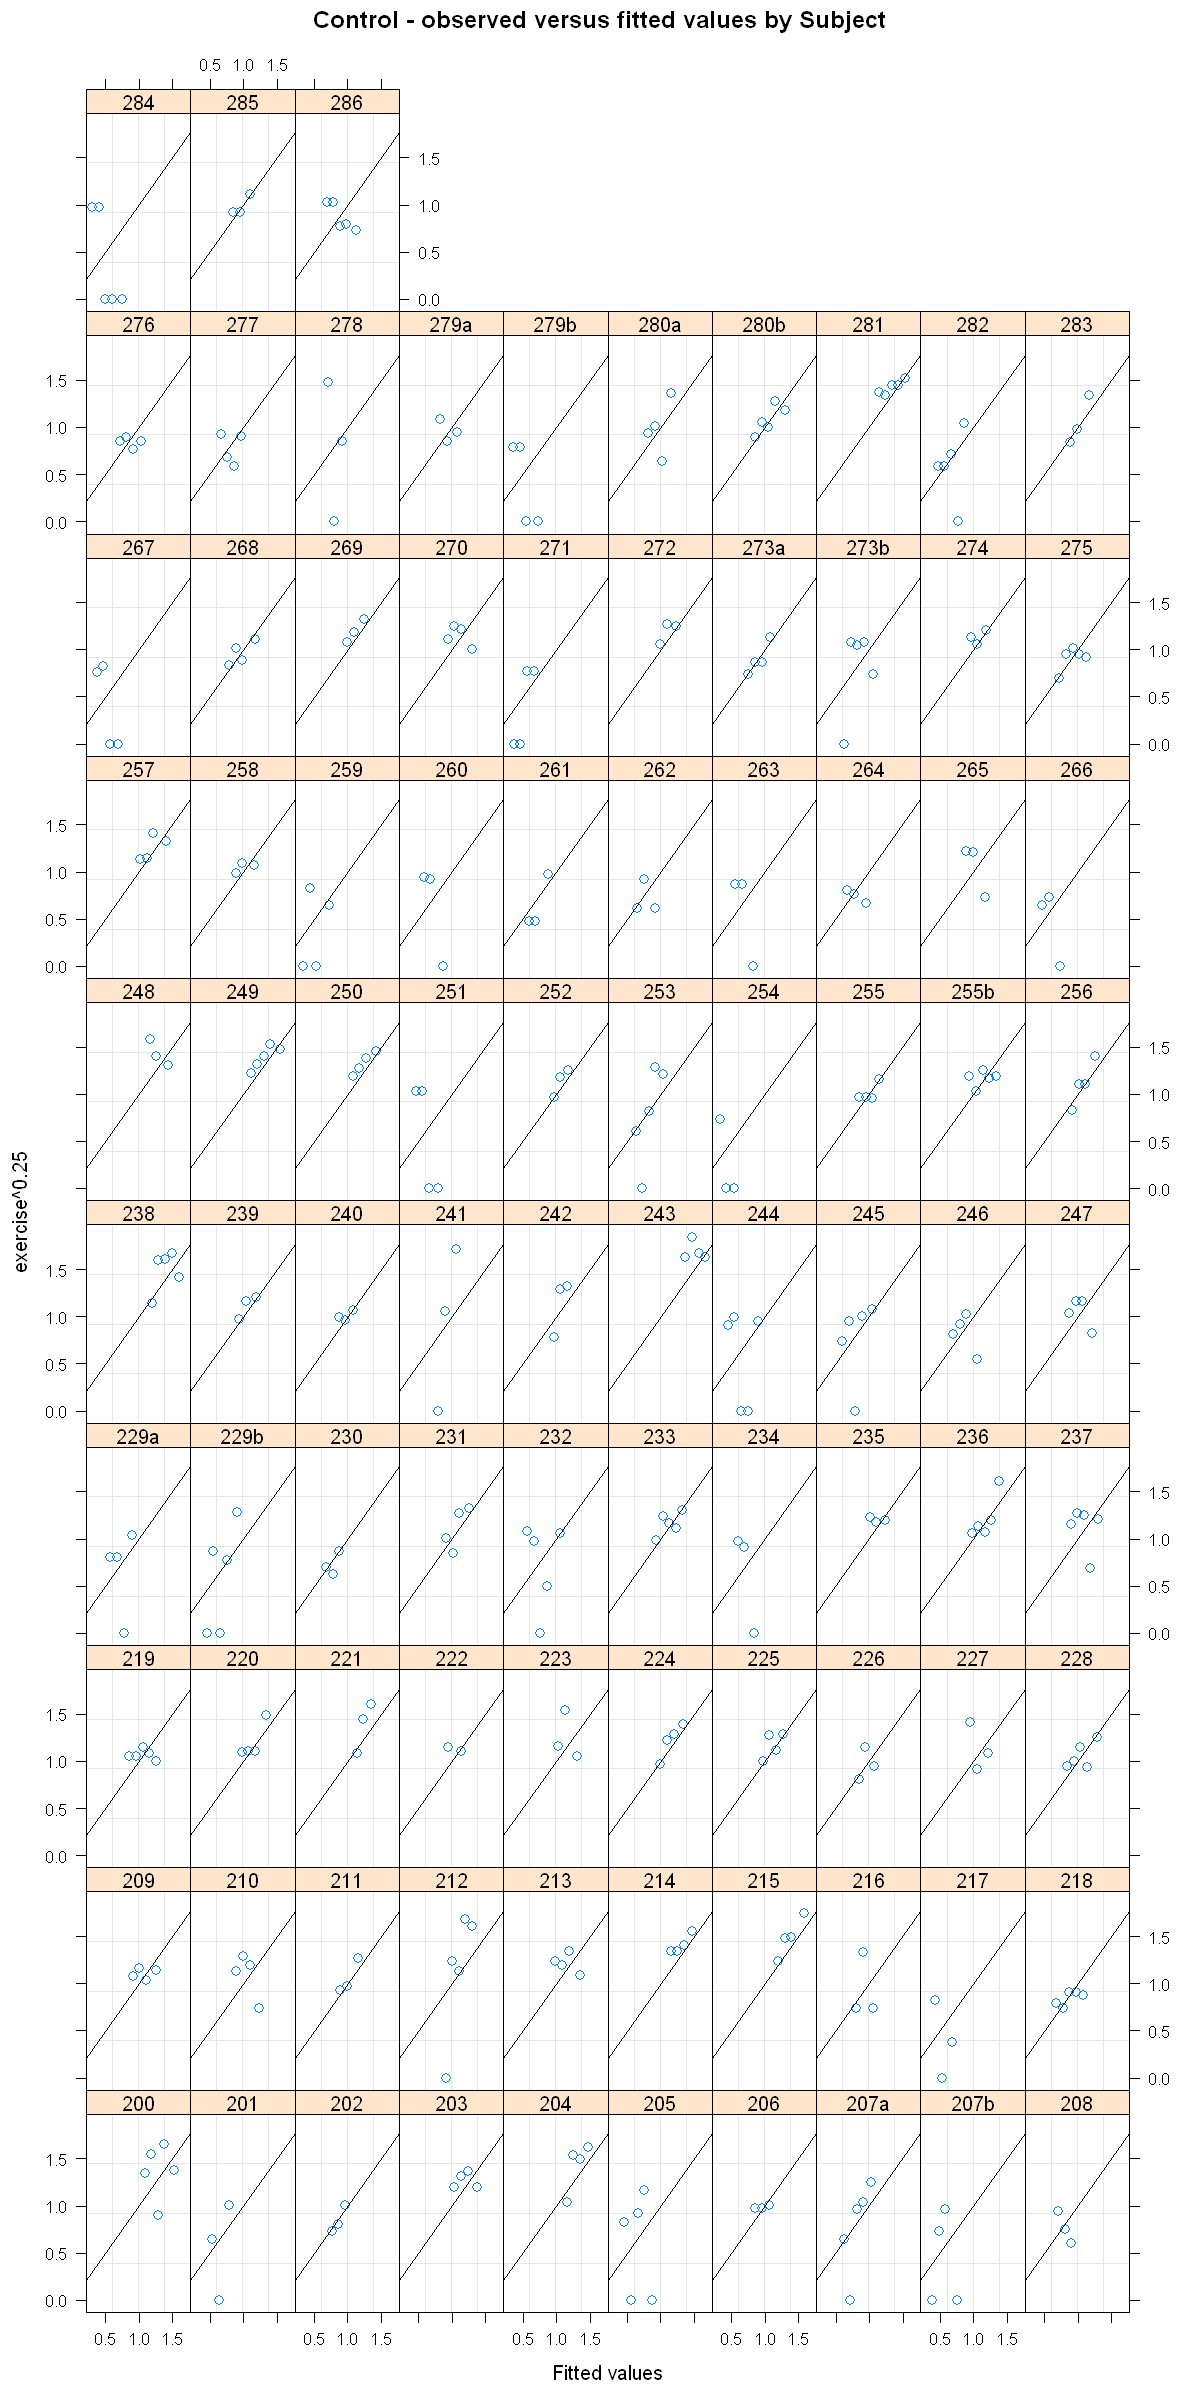

In [120]:
library("nlme")
fit <- lme(exercise ^ 0.25 ~ age + group, random = ~ 1|subject, method = "REML", data = girls)
print(summary(fit2,cor=F))
options(repr.plot.width=10, repr.plot.height=20)
plot(fit, exercise ^ 0.25 ~ fitted(.) | subject, abline = c(0,1), subset = girls$group == 'patient', main = "Patients - observed versus fitted values by Subject")
plot(fit, exercise ^ 0.25 ~ fitted(.) | subject, abline = c(0,1), subset = girls$group == 'control', main = "Control - observed versus fitted values by Subject")

In [32]:
library("nlme")
fit.log <- lme(log(exercise) ~ log(age), random = ~ 1|subject, method = "ML", data = girls)
print(summary(fit2,cor=F))
plot(fit.log, log(exercise) ~ fitted(.) | subject, abline = c(0,1), subset = girls$group == 'patient', main = "observed versus fitted values by Subject")
plot(fit.log, log(exercise) ~ fitted(.) | subject, abline = c(0,1), subset = girls$group == 'control', main = "observed versus fitted values by Subject")

ERROR: Error in MEEM(object, conLin, control$niterEM): NA/NaN/Inf in foreign function call (arg 1)


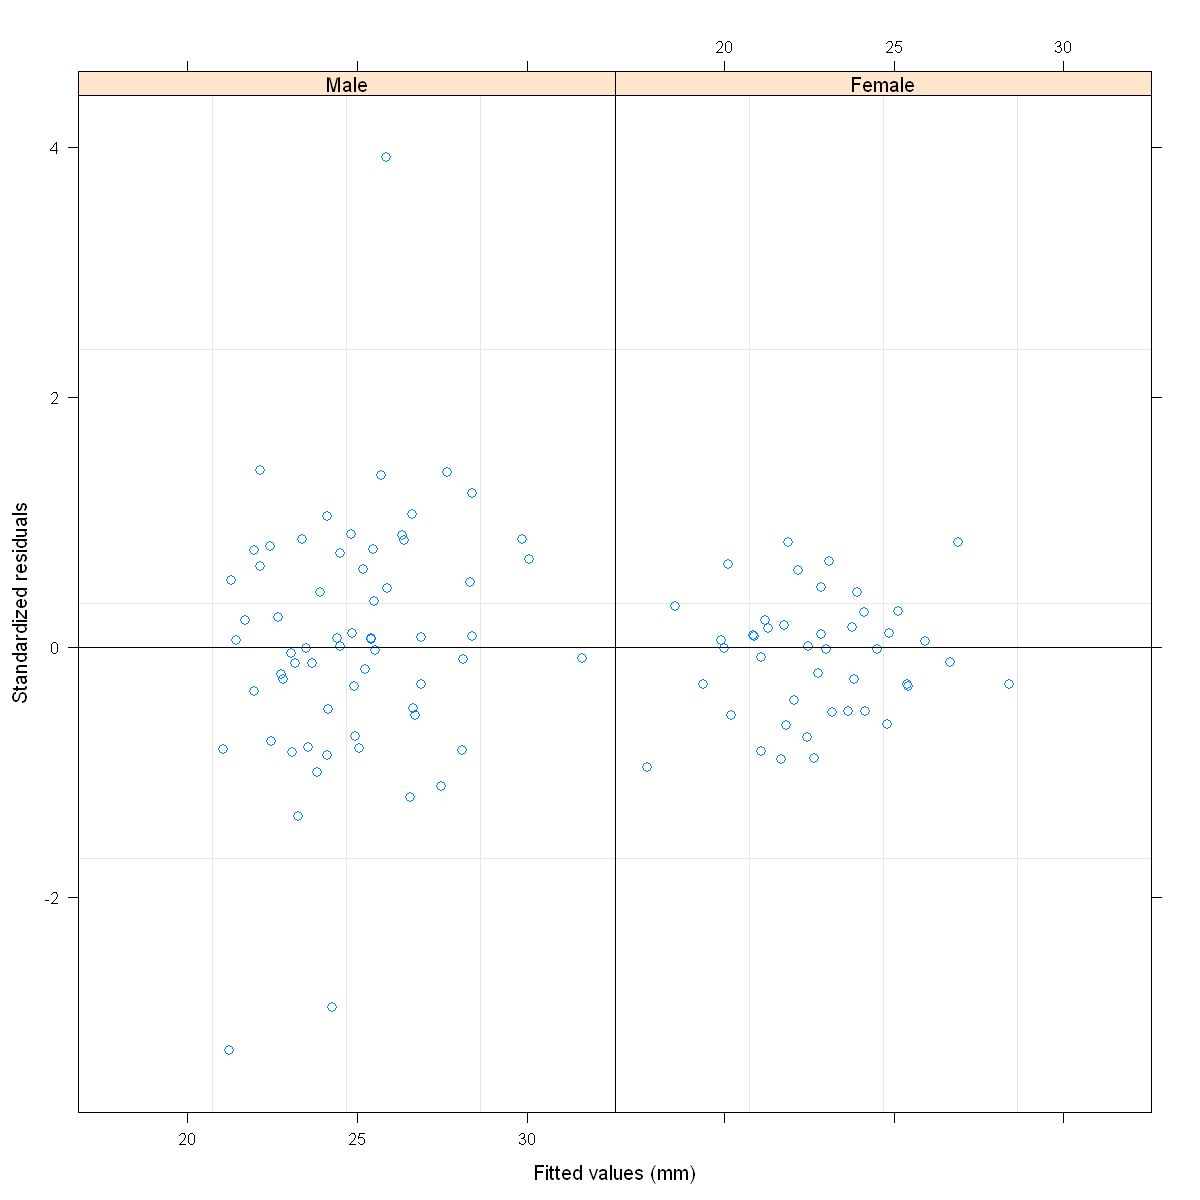

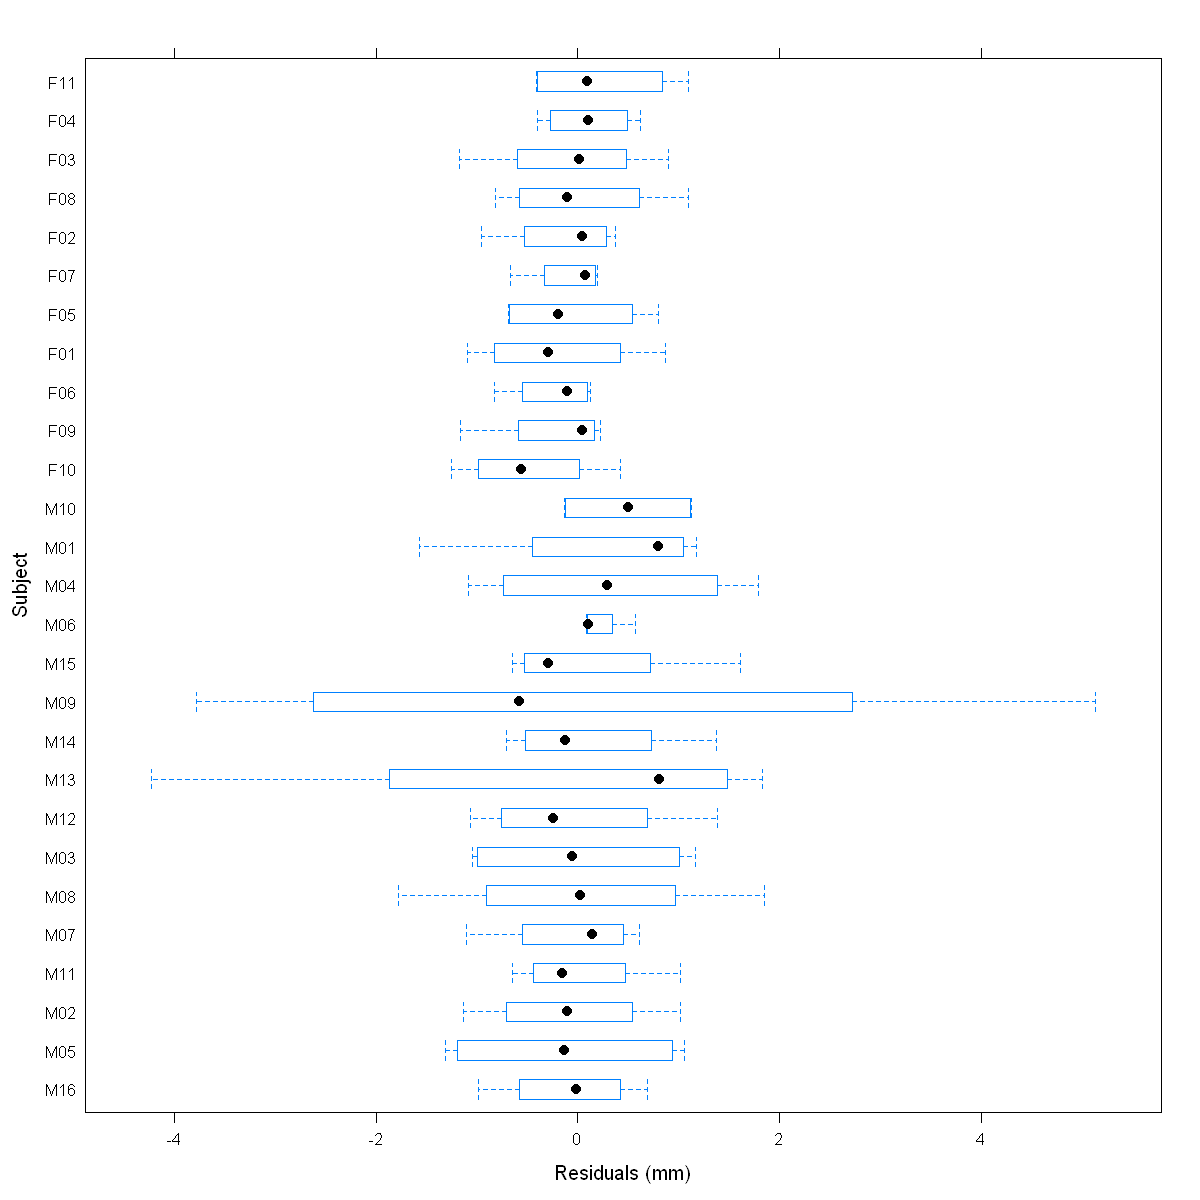

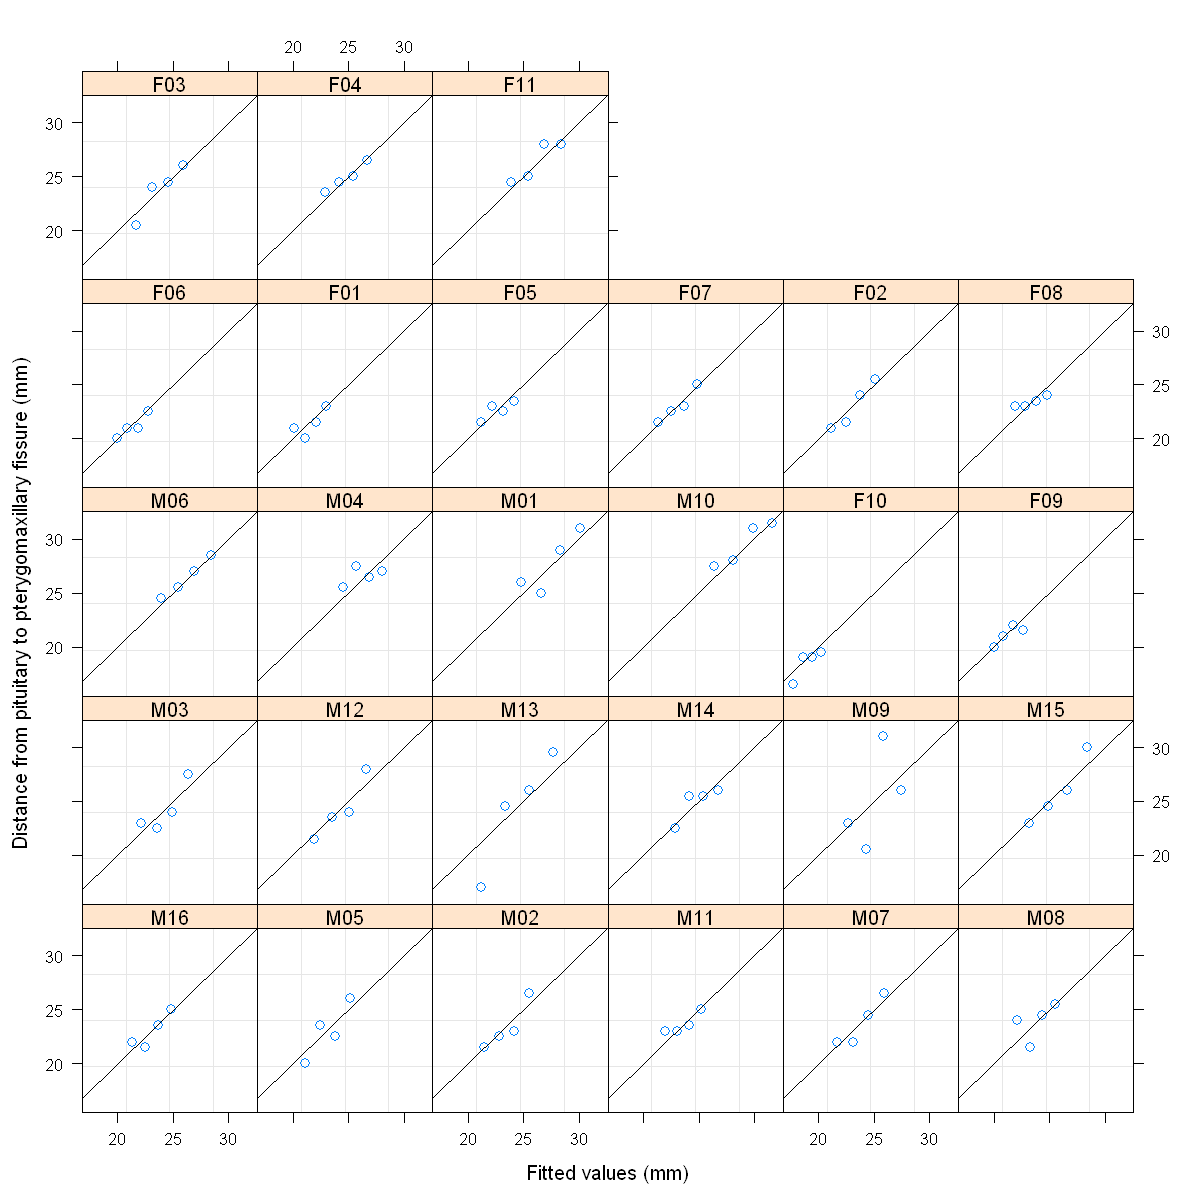

In [157]:
fm1 <- lme(distance ~ age, Orthodont, random = ~ age | Subject)
options(repr.plot.width=10, repr.plot.height=10)
# standardized residuals versus fitted values by gender
plot(fm1, resid(., type = "p") ~ fitted(.) | Sex, abline = 0)
# box-plots of residuals by Subject
plot(fm1, Subject ~ resid(.))
# observed versus fitted values by Subject
plot(fm1, distance ~ fitted(.) | Subject, abline = c(0,1))